# Base de datos 10 canciones más escuchadas por artistas en Youtube Y Spotify hasta 2023

El presente trabajo se basa en una base de datos de las 10 canciones más populares de diferentes artistas, en la cual se han medido diferentes parámetros, tales como la danzabilidad, la energía, el volumen, tiempo de reproducción etc. Además, se han registrado los datos de reproducción de cada una de estas canciones en Spotify y YouTube. 
Nombre del Dataset: Youtube_Spotify.csv
Fuente: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

In [2]:
import pandas as pd
import sqlite3

In [3]:
db_path = "mi_base_de_datos.db"

In [4]:
conn = sqlite3.connect(db_path)

In [5]:
# Mostrar las tablas disponibles en la base de datos
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("Tablas disponibles:")
print(tables)

Tablas disponibles:
       name
0  artistas
1     final


In [6]:
# Leer una tabla específica en un DataFrame
table_name = "final"  # Reemplaza con el nombre de la tabla que deseas leer
df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)

In [7]:
# Leer una tabla específica en un DataFrame
table_name = "artistas"  # Reemplaza con el nombre de la tabla que deseas leer
df_artistas = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)

In [8]:
# Cerrar la conexión
conn.close()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track_Id          20718 non-null  int64  
 1   Acousticness      20716 non-null  float64
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Artist            20718 non-null  object 
 5   Channel           20248 non-null  object 
 6   Comments          20149 non-null  float64
 7   Danceability      20716 non-null  float64
 8   Date              20718 non-null  object 
 9   Duration_ms       20716 non-null  float64
 10  Energy            20716 non-null  float64
 11  Instrumentalness  20716 non-null  float64
 12  Key               20716 non-null  float64
 13  Licensed          20248 non-null  float64
 14  Likes             20177 non-null  float64
 15  Liveness          20716 non-null  float64
 16  Loudness          20716 non-null  float6

In [10]:
df.columns

Index(['Track_Id', 'Acousticness', 'Album', 'Album_type', 'Artist', 'Channel',
       'Comments', 'Danceability', 'Date', 'Duration_ms', 'Energy',
       'Instrumentalness', 'Key', 'Licensed', 'Likes', 'Liveness', 'Loudness',
       'Speechiness', 'Stream', 'Tempo', 'Title', 'Track', 'Valence', 'Views',
       'official_video', 'Artist_ID'],
      dtype='object')

In [11]:
df_artistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  2079 non-null   object
 1   Genero  2079 non-null   object
dtypes: object(2)
memory usage: 32.6+ KB


Se convierte la columna Date a columna de fecha

In [12]:
df['Date'] = pd.to_datetime(df['Date'])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Track_Id          20718 non-null  int64         
 1   Acousticness      20716 non-null  float64       
 2   Album             20718 non-null  object        
 3   Album_type        20718 non-null  object        
 4   Artist            20718 non-null  object        
 5   Channel           20248 non-null  object        
 6   Comments          20149 non-null  float64       
 7   Danceability      20716 non-null  float64       
 8   Date              20718 non-null  datetime64[ns]
 9   Duration_ms       20716 non-null  float64       
 10  Energy            20716 non-null  float64       
 11  Instrumentalness  20716 non-null  float64       
 12  Key               20716 non-null  float64       
 13  Licensed          20248 non-null  float64       
 14  Likes             2017

Vamos a crear la columna Year y Decada

In [14]:
df['Year']=df.Date.dt.year

In [15]:

df['Decada'] = (df['Year'] // 10) * 10

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

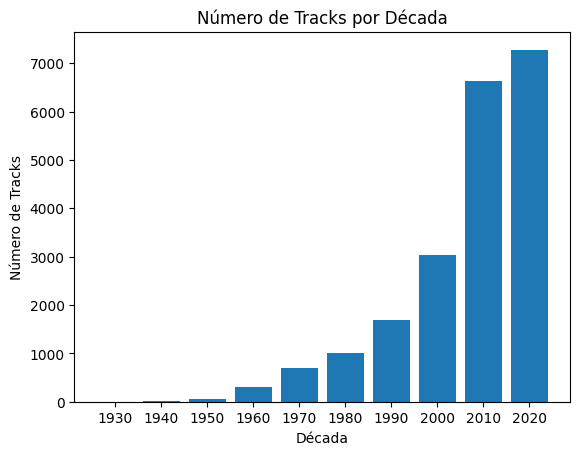

In [17]:
# Contar el número de tracks por década
tracks_por_decada = df['Decada'].value_counts().sort_index()

# Crear el histograma
plt.bar(tracks_por_decada.index, tracks_por_decada.values, width=8)  # width ajusta el ancho de las barras
plt.xlabel('Década')
plt.ylabel('Número de Tracks')
plt.title('Número de Tracks por Década')
plt.xticks(tracks_por_decada.index)  # Mostrar las décadas en el eje X
plt.show()

In [18]:
df.columns

Index(['Track_Id', 'Acousticness', 'Album', 'Album_type', 'Artist', 'Channel',
       'Comments', 'Danceability', 'Date', 'Duration_ms', 'Energy',
       'Instrumentalness', 'Key', 'Licensed', 'Likes', 'Liveness', 'Loudness',
       'Speechiness', 'Stream', 'Tempo', 'Title', 'Track', 'Valence', 'Views',
       'official_video', 'Artist_ID', 'Year', 'Decada'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Track_Id          20718 non-null  int64         
 1   Acousticness      20716 non-null  float64       
 2   Album             20718 non-null  object        
 3   Album_type        20718 non-null  object        
 4   Artist            20718 non-null  object        
 5   Channel           20248 non-null  object        
 6   Comments          20149 non-null  float64       
 7   Danceability      20716 non-null  float64       
 8   Date              20718 non-null  datetime64[ns]
 9   Duration_ms       20716 non-null  float64       
 10  Energy            20716 non-null  float64       
 11  Instrumentalness  20716 non-null  float64       
 12  Key               20716 non-null  float64       
 13  Licensed          20248 non-null  float64       
 14  Likes             2017

In [20]:
# Eliminar filas con valores nulos en las columnas necesarias
df_final = df.dropna()

df_final.info()



<class 'pandas.core.frame.DataFrame'>
Index: 19549 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Track_Id          19549 non-null  int64         
 1   Acousticness      19549 non-null  float64       
 2   Album             19549 non-null  object        
 3   Album_type        19549 non-null  object        
 4   Artist            19549 non-null  object        
 5   Channel           19549 non-null  object        
 6   Comments          19549 non-null  float64       
 7   Danceability      19549 non-null  float64       
 8   Date              19549 non-null  datetime64[ns]
 9   Duration_ms       19549 non-null  float64       
 10  Energy            19549 non-null  float64       
 11  Instrumentalness  19549 non-null  float64       
 12  Key               19549 non-null  float64       
 13  Licensed          19549 non-null  float64       
 14  Likes             19549 non

In [21]:
df_final.columns

Index(['Track_Id', 'Acousticness', 'Album', 'Album_type', 'Artist', 'Channel',
       'Comments', 'Danceability', 'Date', 'Duration_ms', 'Energy',
       'Instrumentalness', 'Key', 'Licensed', 'Likes', 'Liveness', 'Loudness',
       'Speechiness', 'Stream', 'Tempo', 'Title', 'Track', 'Valence', 'Views',
       'official_video', 'Artist_ID', 'Year', 'Decada'],
      dtype='object')

In [22]:
df_final.Stream

0        1.040235e+09
1        3.100837e+08
2        6.306347e+07
3        4.346636e+08
4        6.172597e+08
             ...     
20713    9.227144e+06
20714    1.089818e+07
20715    6.226110e+06
20716    6.873961e+06
20717    5.695584e+06
Name: Stream, Length: 19549, dtype: float64

In [23]:
df_final = df_final.drop(columns=['Track_Id','Channel','Comments', 'Artist_ID','Comments'])

Vamos a averiguar si hay canciones repetidas

In [24]:
duplicados = df_final['Track'].duplicated().sum()
canciones_duplicadas = df_final[df_final['Track'].duplicated()]
canciones_duplicadas[['Track','Artist']]

Track          Artist
141                                                 Numb          Khalid
155                                      DON'T YOU WORRY         Shakira
248                                ay! (feat. Lil Wayne)       Lil Wayne
296                                       Pump It Louder          Tiësto
312                                        Numb / Encore           JAY-Z
...                                                  ...             ...
20637  Playground (from the series Arcane League of L...          Arcane
20672                                        Que Vuelvas  Grupo Frontera
20673                                          Bebe Dame  Grupo Frontera
20675                                      911 - En Vivo  Grupo Frontera
20679                                               Vete  Grupo Frontera

[2683 rows x 2 columns]

In [25]:
conteo_canciones = df_final['Track'].value_counts()
canciones_repetidas = conteo_canciones[conteo_canciones > 1]
print(canciones_repetidas)

Track
El Ultimo Adiós - Varios Artistas Version                     23
Color Esperanza 2020                                          19
Resistiré                                                     14
Heaven                                                         9
52 Non Stop Dilbar Dilbar Remix(Remix By Kedrock,Sd Style)     9
                                                              ..
The Boys                                                       2
Quien TV Remix                                                 2
The Imperial March (Darth Vader's Theme)                       2
Beautiful Mistakes (feat. Megan Thee Stallion)                 2
Kiss Me                                                        2
Name: count, Length: 1985, dtype: int64


In [26]:
print(f"Número de canciones repetidas: {duplicados}")

Número de canciones repetidas: 2683


Vamos a dejar el dataframe con canciones unicas, por lo tanto se van a eliminar las repetidas y se dejará la que tenga más reproducciones dentro de estas. Se va a dejar el track que tenga más reproducciones(stream)

In [27]:
df_final = df_final.loc[df_final.groupby('Track')['Stream'].idxmax()]

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16866 entries, 1517 to 13212
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Acousticness      16866 non-null  float64       
 1   Album             16866 non-null  object        
 2   Album_type        16866 non-null  object        
 3   Artist            16866 non-null  object        
 4   Danceability      16866 non-null  float64       
 5   Date              16866 non-null  datetime64[ns]
 6   Duration_ms       16866 non-null  float64       
 7   Energy            16866 non-null  float64       
 8   Instrumentalness  16866 non-null  float64       
 9   Key               16866 non-null  float64       
 10  Licensed          16866 non-null  float64       
 11  Likes             16866 non-null  float64       
 12  Liveness          16866 non-null  float64       
 13  Loudness          16866 non-null  float64       
 14  Speechiness       16866 

Compración de reproducciones de Spotify vs Youtube

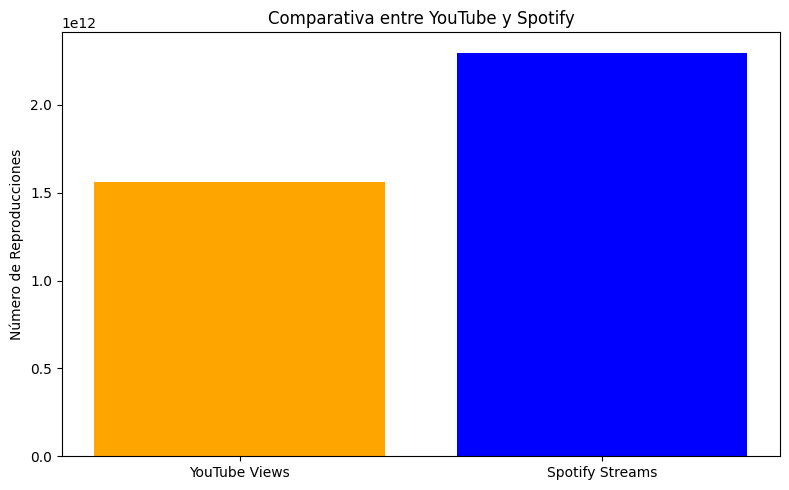

In [28]:
Views_youtube=df_final.Views.sum()
Stream_spotify=df_final.Stream.sum()


# Etiquetas y valores
labels = ['YouTube Views', 'Spotify Streams']
values = [Views_youtube, Stream_spotify]

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['orange', 'blue'])

# Personalización del gráfico
plt.ylabel('Número de Reproducciones')
plt.title('Comparativa entre YouTube y Spotify')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

10 Canciones más reproducidas en Spotify

In [29]:
top_10_canciones = df_final.sort_values(by='Stream', ascending=False).head(10)
top_10_canciones[['Track','Artist','Stream']]

Track           Artist  \
15250                                Blinding Lights       The Weeknd   
12452                                   Shape of You       Ed Sheeran   
19186                              Someone You Loved    Lewis Capaldi   
17937                     rockstar (feat. 21 Savage)      Post Malone   
17445  Sunflower - Spider-Man: Into the Spider-Verse         Swae Lee   
13503                                      One Dance            Drake   
16028                                         Closer           Halsey   
14030                                       Believer  Imagine Dragons   
14069                      STAY (with Justin Bieber)    Justin Bieber   
17288                                       Señorita     Shawn Mendes   

             Stream  
15250  3.386520e+09  
12452  3.362005e+09  
19186  2.634013e+09  
17937  2.594927e+09  
17445  2.538330e+09  
13503  2.522432e+09  
16028  2.456205e+09  
14030  2.369272e+09  
14069  2.365778e+09  
17288  2.336220e+09

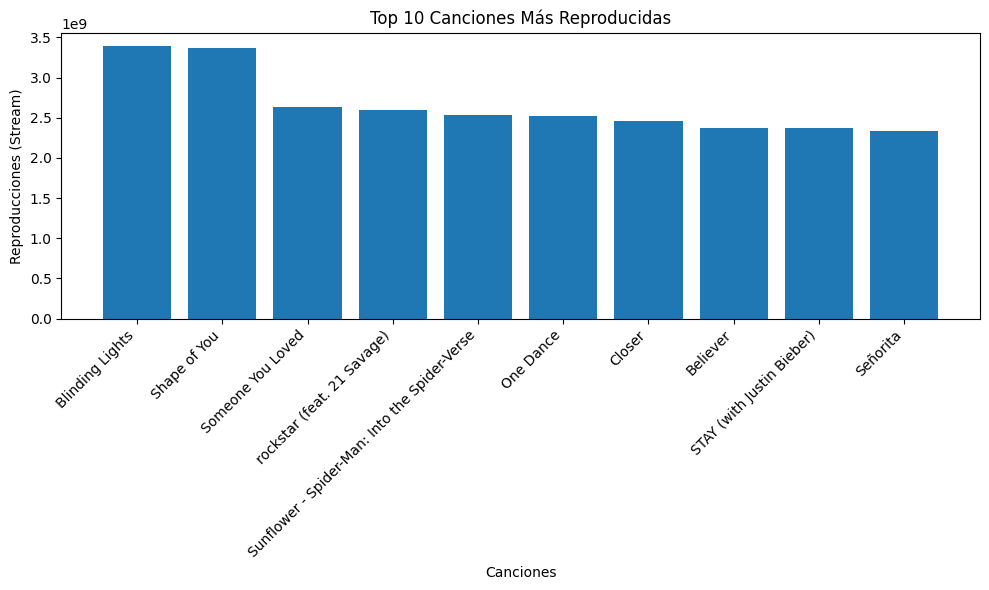

In [30]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_canciones['Track'], top_10_canciones['Stream'])
plt.xlabel('Canciones')
plt.ylabel('Reproducciones (Stream)')
plt.title('Top 10 Canciones Más Reproducidas')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas de las canciones
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


10 canciones más reproducidas en Youtube

In [31]:
top_10_canciones = df_final.sort_values(by='Views', ascending=False).head(10)
top_10_canciones[['Track','Artist','Views']]

Track         Artist         Views
365                             Despacito   Daddy Yankee  8.079647e+09
12452                        Shape of You     Ed Sheeran  5.908398e+09
12469  See You Again (feat. Charlie Puth)    Wiz Khalifa  5.773797e+09
20303                   Wheels on the Bus      CoComelon  4.898831e+09
10686      Uptown Funk (feat. Bruno Mars)    Mark Ronson  4.821016e+09
8937                Gangnam Style (강남스타일)            PSY  4.679767e+09
9569                                Sugar       Maroon 5  3.817733e+09
13032                                Roar     Katy Perry  3.725749e+09
13040                      Counting Stars    OneRepublic  3.721610e+09
14074                               Sorry  Justin Bieber  3.627306e+09

/tmp/ipykernel_483687/3395167530.py:8: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
/tmp/ipykernel_483687/3395167530.py:8: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
/tmp/ipykernel_483687/3395167530.py:8: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
/tmp/ipykernel_483687/3395167530.py:8: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
/tmp/ipykernel_483687/3395167530.py:8: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
/home/jjmoras/pyprojects/ambientes/spoty_

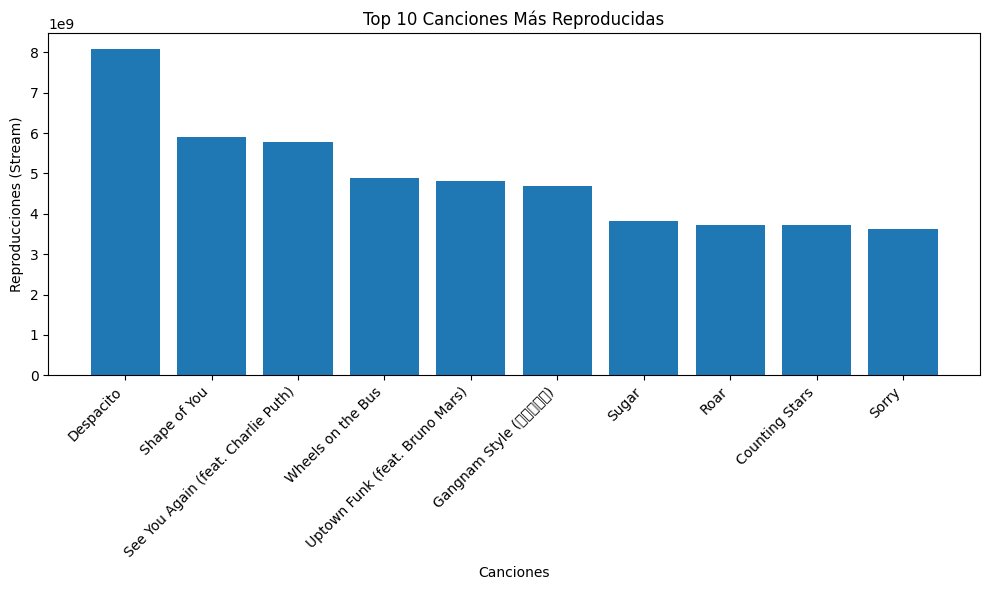

In [32]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_canciones['Track'], top_10_canciones['Views'])
plt.xlabel('Canciones')
plt.ylabel('Reproducciones (Stream)')
plt.title('Top 10 Canciones Más Reproducidas')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas de las canciones
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

In [33]:
import numpy as np

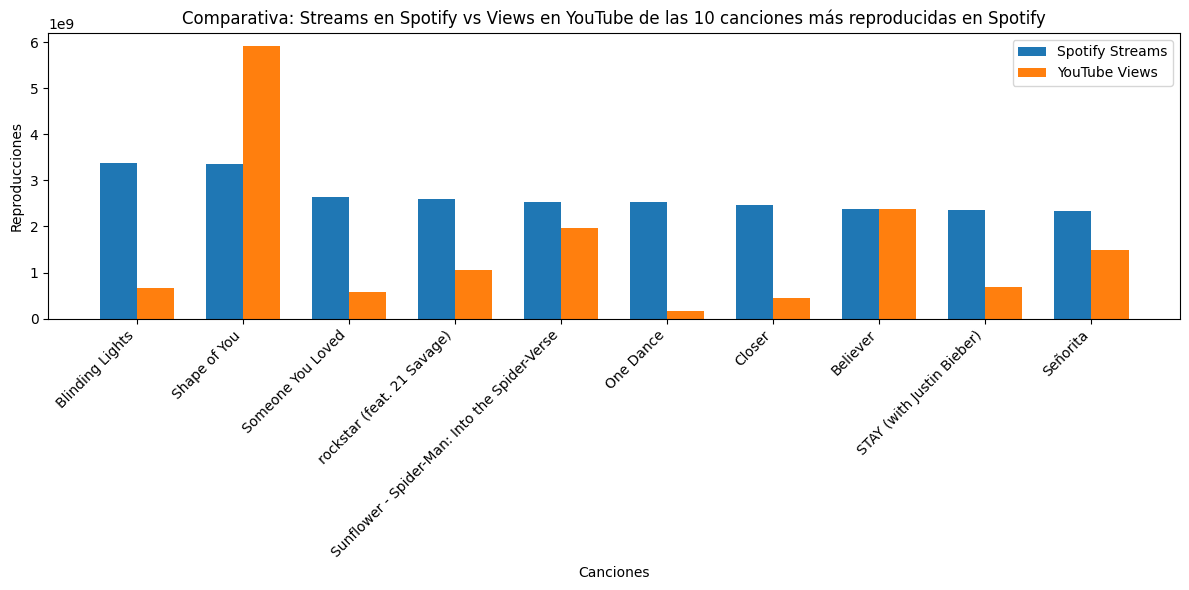

In [34]:
# Seleccionar datos relevantes
comparativa = df_final[['Track', 'Stream', 'Views']].nlargest(10, 'Stream')

# Configurar el gráfico
x = np.arange(len(comparativa['Track']))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(12, 6))

# Barras para Spotify
plt.bar(x - width/2, comparativa['Stream'], width, label='Spotify Streams')

# Barras para YouTube
plt.bar(x + width/2, comparativa['Views'], width, label='YouTube Views')

# Personalización
plt.xlabel('Canciones')
plt.ylabel('Reproducciones')
plt.title('Comparativa: Streams en Spotify vs Views en YouTube de las 10 canciones más reproducidas en Spotify')
plt.xticks(x, comparativa['Track'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

/tmp/ipykernel_483687/1487045520.py:22: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_483687/1487045520.py:22: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_483687/1487045520.py:22: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_483687/1487045520.py:22: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_483687/1487045520.py:22: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/jjmoras/pyprojects/ambientes/spoty_youtube/spoty/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jjmoras/pyprojects/am

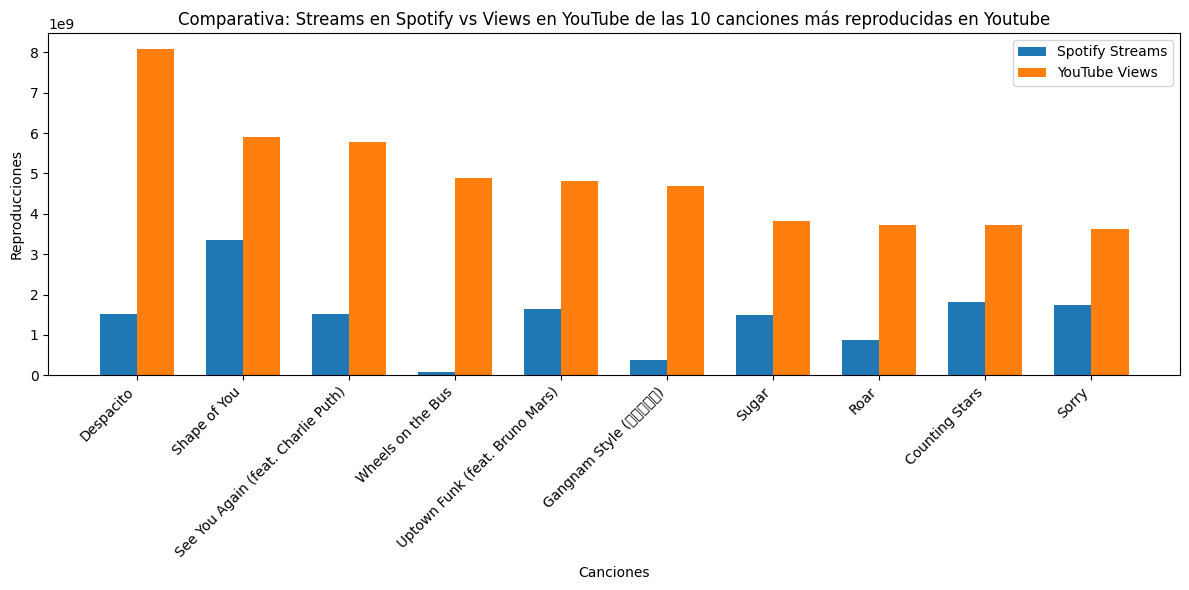

In [35]:
# Seleccionar datos relevantes
comparativa = df_final[['Track', 'Stream', 'Views']].nlargest(10, 'Views')

# Configurar el gráfico
x = np.arange(len(comparativa['Track']))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(12, 6))

# Barras para Spotify
plt.bar(x - width/2, comparativa['Stream'], width, label='Spotify Streams')

# Barras para YouTube
plt.bar(x + width/2, comparativa['Views'], width, label='YouTube Views')

# Personalización
plt.xlabel('Canciones')
plt.ylabel('Reproducciones')
plt.title('Comparativa: Streams en Spotify vs Views en YouTube de las 10 canciones más reproducidas en Youtube')
plt.xticks(x, comparativa['Track'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

Hay una disparidad entre las canciones que se escuchan en Youtube con las reproducciones en spotify

Vamos a unir el df_final con el data frame de artistas para hacer el análisis desde el punto de vista del genero

In [36]:
df_final = df_final.merge(df_artistas, on='Artist', how='left')
df_final['Genero'] = df_final['Genero'].fillna("Desconocido")

In [37]:
df_final.Genero

0              italian hip hop, italian pop, trap italiana
1                                                         
2        ambient, braindance, electronica, intelligent ...
3                           jam band, neo mellow, pop rock
4                        argentine hip hop, trap argentino
                               ...                        
16861                                        j-pop, j-rock
16862                                                k-pop
16863                                    k-pop, korean r&b
16864                              k-pop, k-pop girl group
16865                                    k-pop, korean r&b
Name: Genero, Length: 16866, dtype: object

Para hacer un mejor análisis por genero vamos a crear un df donde los géneros no estén agrupados en una sola celda y  cada canción se repite para cada género del artista.

In [38]:
df_final.columns

Index(['Acousticness', 'Album', 'Album_type', 'Artist', 'Danceability', 'Date',
       'Duration_ms', 'Energy', 'Instrumentalness', 'Key', 'Licensed', 'Likes',
       'Liveness', 'Loudness', 'Speechiness', 'Stream', 'Tempo', 'Title',
       'Track', 'Valence', 'Views', 'official_video', 'Year', 'Decada',
       'Genero'],
      dtype='object')

In [39]:
df_generos = df_final.assign(Genero=df_final['Genero'].str.split(', ')).explode('Genero')

df_generos[['Genero','Track']]

Genero                     Track
0       italian hip hop          !ly (feat. Coez)
0           italian pop          !ly (feat. Coez)
0         trap italiana          !ly (feat. Coez)
1                        #1 - Colby O'Donis Remix
2               ambient                        #3
...                 ...                       ...
16863        korean r&b  눈,코,입 (Eyes, Nose, Lips)
16864             k-pop   러시안 룰렛 Russian Roulette
16864  k-pop girl group   러시안 룰렛 Russian Roulette
16865             k-pop        링가링가 (RINGA LINGA)
16865        korean r&b        링가링가 (RINGA LINGA)

[58352 rows x 2 columns]

10 Géneros más escuchados en Spotify

In [40]:
streams_por_genero = df_generos.groupby('Genero')['Stream'].sum().sort_values(ascending=False)
streams_por_genero.head(10)

Genero
pop              6.351652e+11
rock             3.193197e+11
rap              3.052912e+11
dance pop        2.049185e+11
hip hop          1.784163e+11
modern rock      1.404857e+11
pop rap          1.298817e+11
urbano latino    1.272582e+11
classic rock     1.189156e+11
trap             1.140800e+11
Name: Stream, dtype: float64

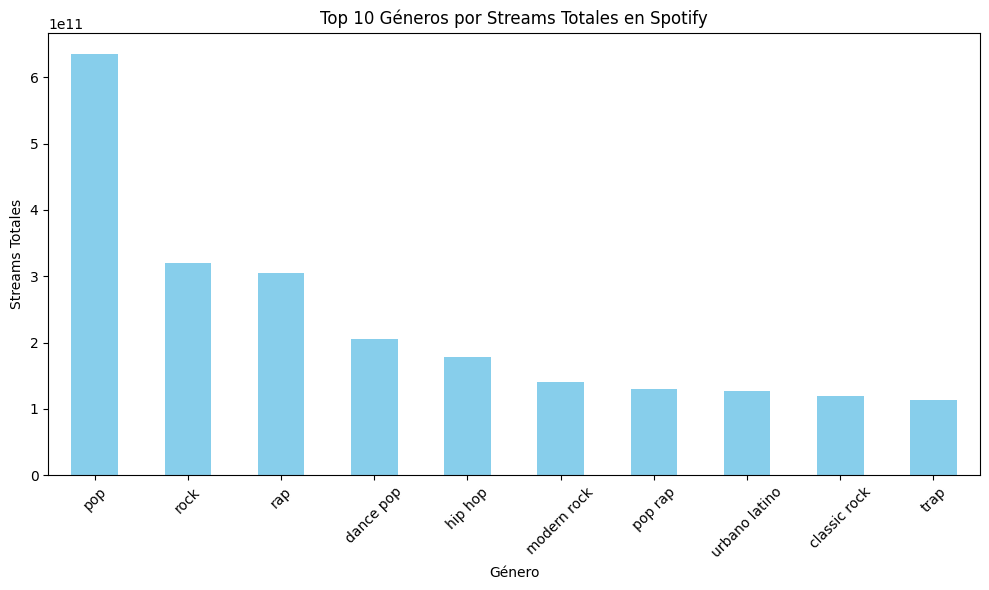

In [41]:

# Top 10 géneros por streams e
top_generos = streams_por_genero.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_generos.plot(kind='bar', color='skyblue')
plt.title('Top 10 Géneros por Streams Totales en Spotify')
plt.xlabel('Género')
plt.ylabel('Streams Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
Views_por_genero = df_generos.groupby('Genero')['Views'].sum().sort_values(ascending=False)
Views_por_genero.head(10)

Genero
pop              4.609450e+11
dance pop        1.836881e+11
urbano latino    1.453556e+11
rap              1.435134e+11
rock             1.423982e+11
latin pop        1.320440e+11
reggaeton        1.238199e+11
trap latino      1.102993e+11
pop rap          9.315175e+10
hip hop          8.769757e+10
Name: Views, dtype: float64

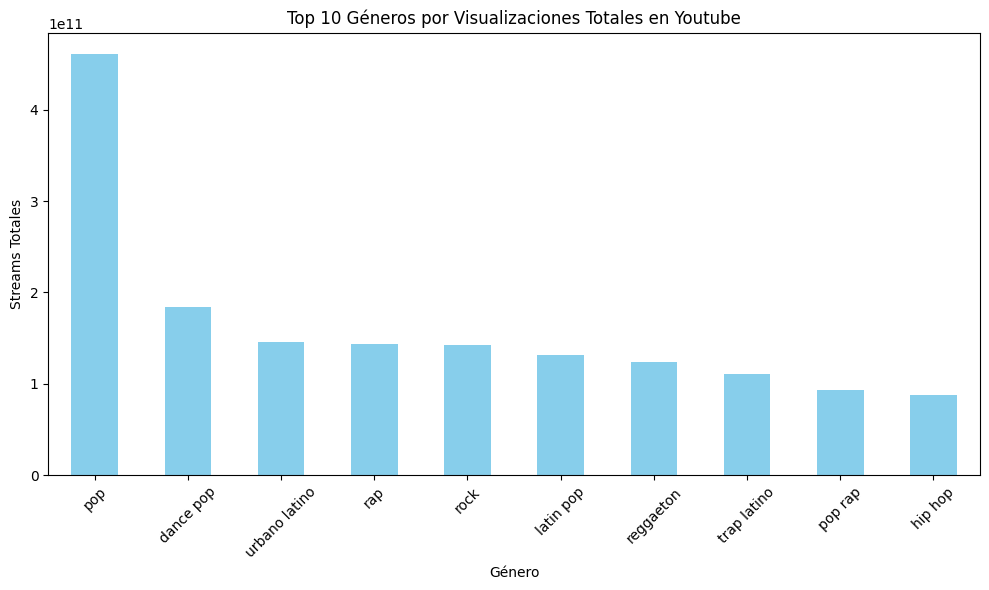

In [43]:
# Top 10 géneros por Views
top_generos = Views_por_genero.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_generos.plot(kind='bar', color='skyblue')
plt.title('Top 10 Géneros por Visualizaciones Totales en Youtube')
plt.xlabel('Género')
plt.ylabel('Streams Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En youtube hay más consumo de músuca urbaba y latina mientras que en spotify hay más consumo de pop y rock

In [44]:
# Agrupar por década y género, y sumar los streams
generos_decada = df_generos.groupby(['Decada', 'Genero'])['Stream'].sum().reset_index()

# Ordenar los resultados por década y streams
generos_decada = generos_decada.sort_values(by=['Decada', 'Stream'], ascending=[True, False])

In [45]:
# Obtener los Top 5 géneros más escuchados por década
top_generos_decada = generos_decada.groupby('Decada').head(5)

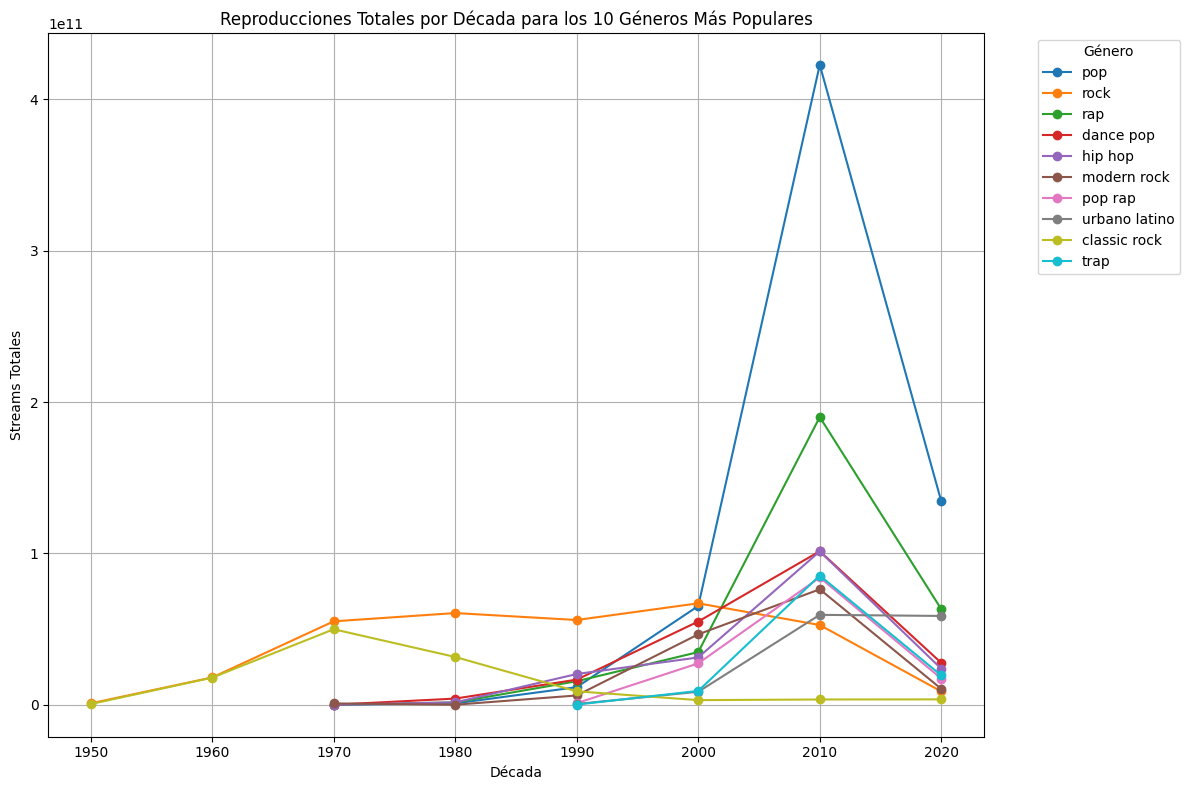

In [46]:
# Sumar streams totales por género
generos_populares = df_generos.groupby('Genero')['Stream'].sum().nlargest(10).index

# Filtrar los datos para incluir solo los 10 géneros más populares
df_top_generos = df_generos[df_generos['Genero'].isin(generos_populares)]

# Sumar streams por década y género
streams_decada_genero = df_top_generos.groupby(['Decada', 'Genero'])['Stream'].sum().reset_index()



plt.figure(figsize=(12, 8))

# Crear una línea para cada género
for genero in generos_populares:
    datos_genero = streams_decada_genero[streams_decada_genero['Genero'] == genero]
    plt.plot(
        datos_genero['Decada'], 
        datos_genero['Stream'], 
        marker='o', 
        label=genero
    )

# Personalizar el gráfico
plt.title('Reproducciones Totales por Década para los 10 Géneros Más Populares')
plt.xlabel('Década')
plt.ylabel('Streams Totales')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

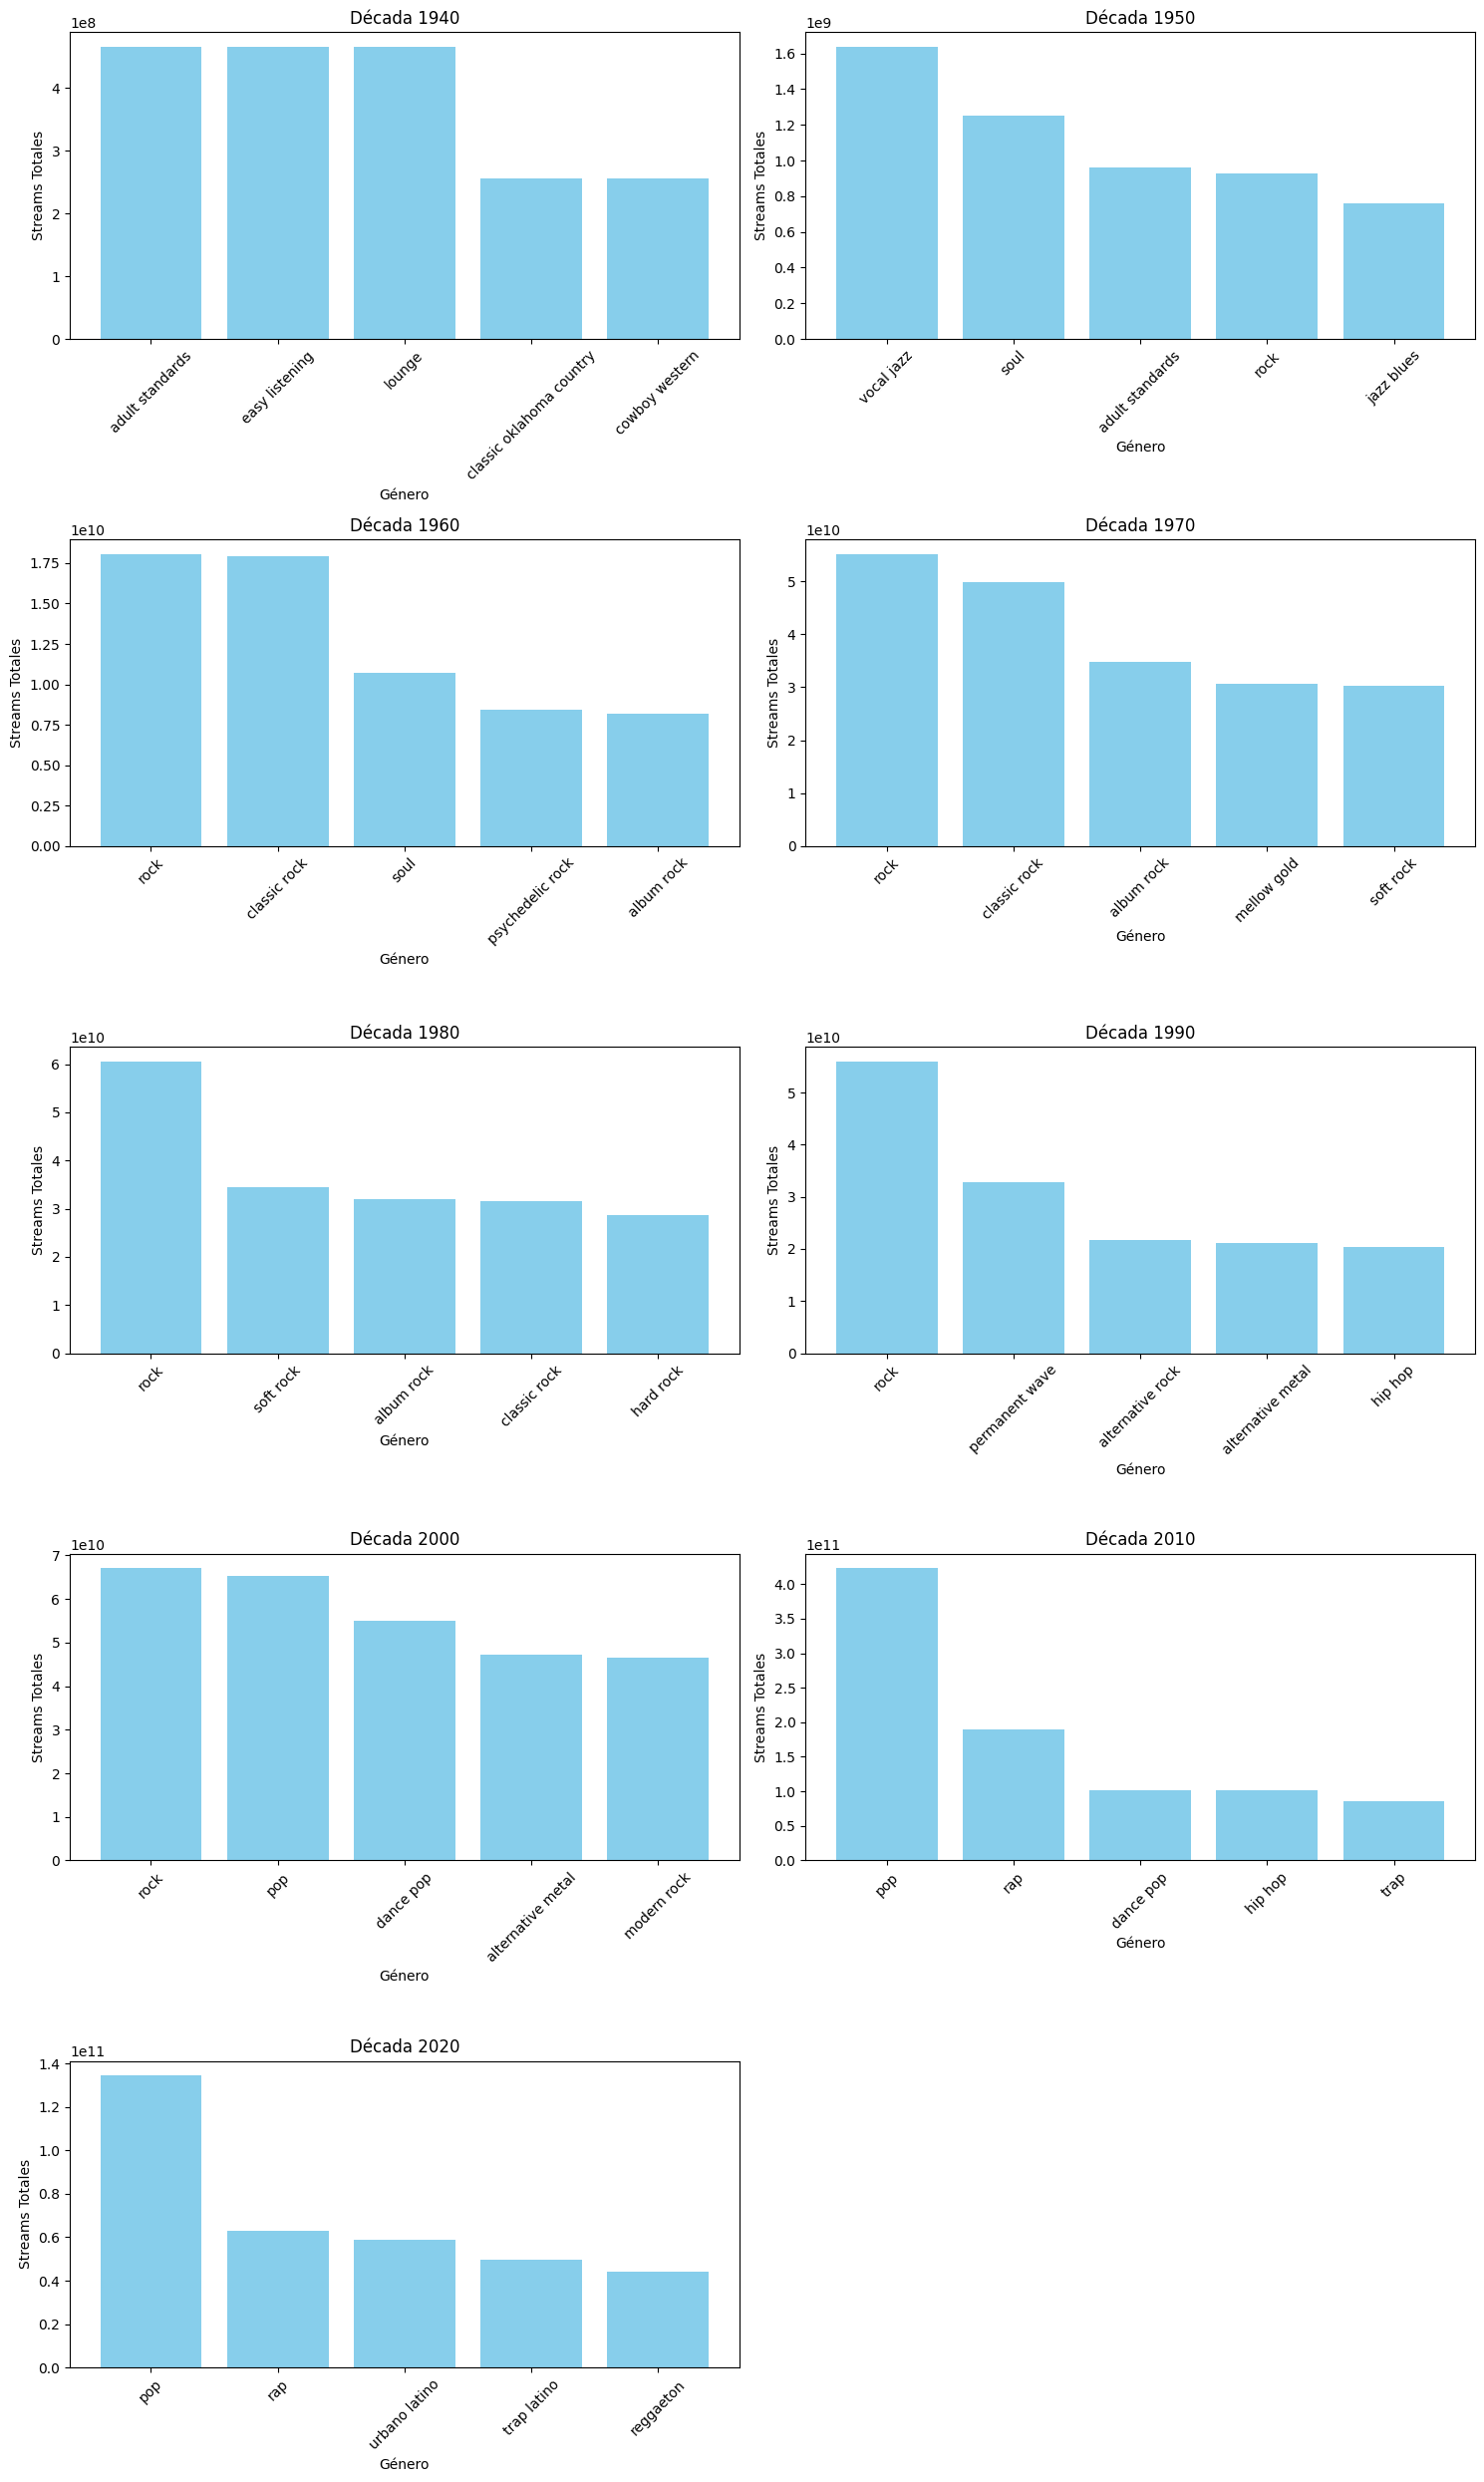

In [47]:

# Listar las décadas únicas
decadas = top_generos_decada['Decada'].unique()

# Configurar el tamaño de la figura
n_rows = -(-len(decadas) // 2)  # Calcula el número de filas necesarias (redondeo hacia arriba)
plt.figure(figsize=(15, n_rows * 5))

# Crear un gráfico para cada década
for i, decada in enumerate(decadas):
    plt.subplot(n_rows, 2, i + 1)  # Subgráfico en una cuadrícula de 2 columnas
    datos_decada = top_generos_decada[top_generos_decada['Decada'] == decada]
    plt.bar(datos_decada['Genero'], datos_decada['Stream'], color='skyblue')
    plt.title(f'Década {decada}')
    plt.xlabel('Género')
    plt.ylabel('Streams Totales')
    plt.xticks(rotation=45)

# Ajustar el diseño
plt.tight_layout()
plt.show()


## Evaluación por caracteristicas sonoras
Vamos a evaluar como se comportan las cualidades sonoras de las canciones. Para esto vamos a crear un df donde solo se encuentren dichas cualidades

In [48]:

#creamos una nueva columna de duración en minutos
df_final['Duration_min']=df_final['Duration_ms']/60000

In [49]:
df_caracteristicas=df_final[['Acousticness','Danceability', 'Date', 'Duration_min', 'Energy',
       'Instrumentalness', 'Key','Likes', 'Liveness', 'Loudness',
       'Speechiness', 'Stream', 'Tempo', 'Valence', 'Views',
        'Year', 'Decada']]

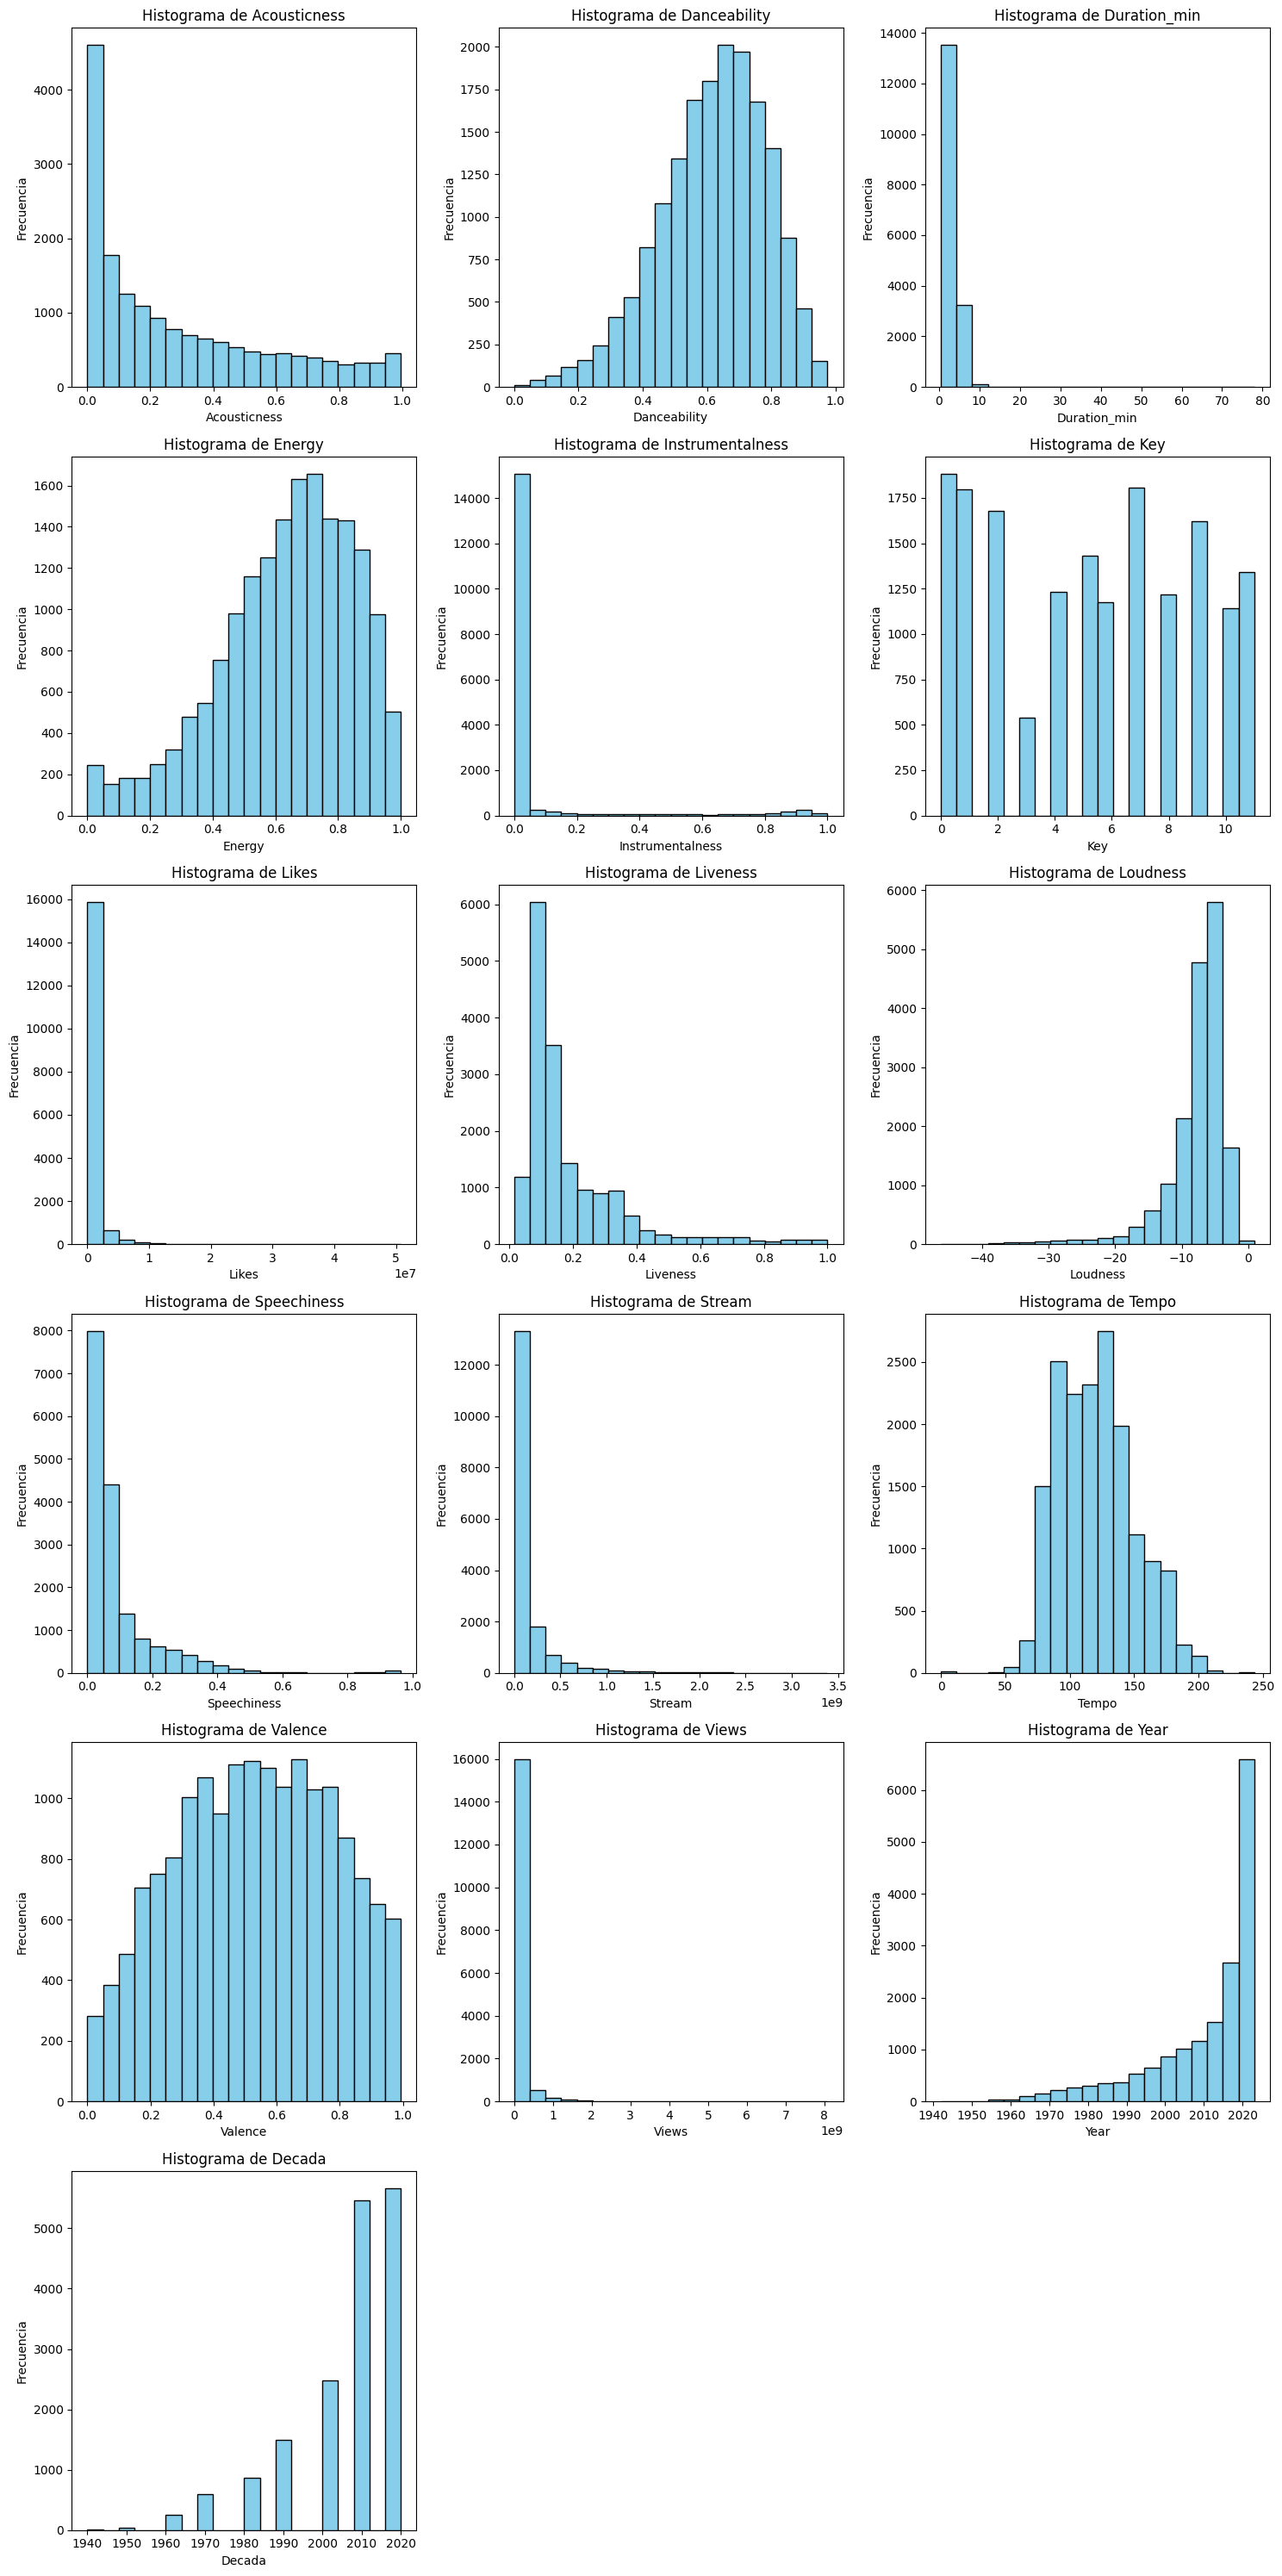

In [50]:

# Filtrar las columnas numéricas
df_caracteristicas_numericas = df_caracteristicas.select_dtypes(include=['number'])

# Configurar la figura para los histogramas
num_columnas = len(df_caracteristicas_numericas.columns)
num_filas = (num_columnas + 2) // 3  # Calcula el número de filas para una cuadrícula de 3 columnas
plt.figure(figsize=(15, num_filas * 5))

# Crear un histograma para cada columna numérica
for i, columna in enumerate(df_caracteristicas_numericas.columns):
    plt.subplot(num_filas, 3, i + 1)  # Configurar subgráficos con 3 columnas
    plt.hist(df_caracteristicas_numericas[columna].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

## Análisis de variable físiscas de las canciones

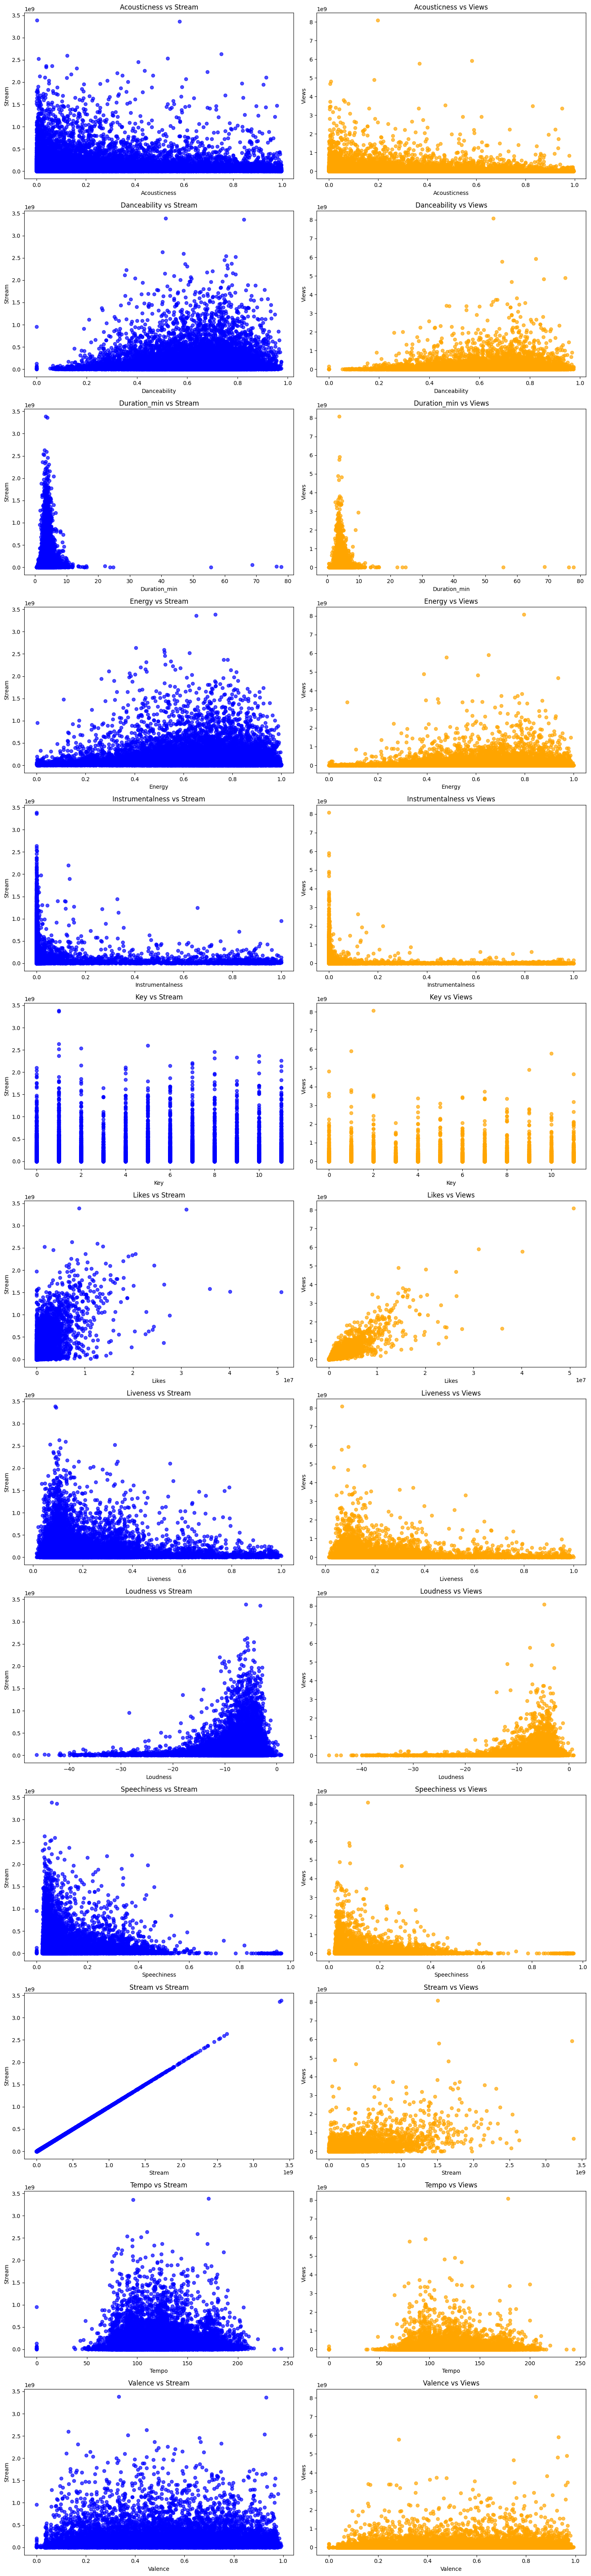

In [51]:
# Seleccionar las columnas numéricas para analizar
variables = ['Acousticness','Danceability', 'Duration_min', 'Energy',
       'Instrumentalness', 'Key','Likes', 'Liveness', 'Loudness',
       'Speechiness', 'Stream', 'Tempo', 'Valence',
        ]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, len(variables) * 5))

# Graficar cada variable contra Stream
for i, var in enumerate(variables):
    plt.subplot(len(variables), 2, 2 * i + 1)
    plt.scatter(df_caracteristicas[var], df_caracteristicas['Stream'], alpha=0.7, color='blue')
    plt.title(f'{var} vs Stream')
    plt.xlabel(var)
    plt.ylabel('Stream')
    
    plt.subplot(len(variables), 2, 2 * i + 2)
    plt.scatter(df_caracteristicas[var], df_caracteristicas['Views'], alpha=0.7, color='orange')
    plt.title(f'{var} vs Views')
    plt.xlabel(var)
    plt.ylabel('Views')

# Ajustar diseño
plt.tight_layout()
plt.show()


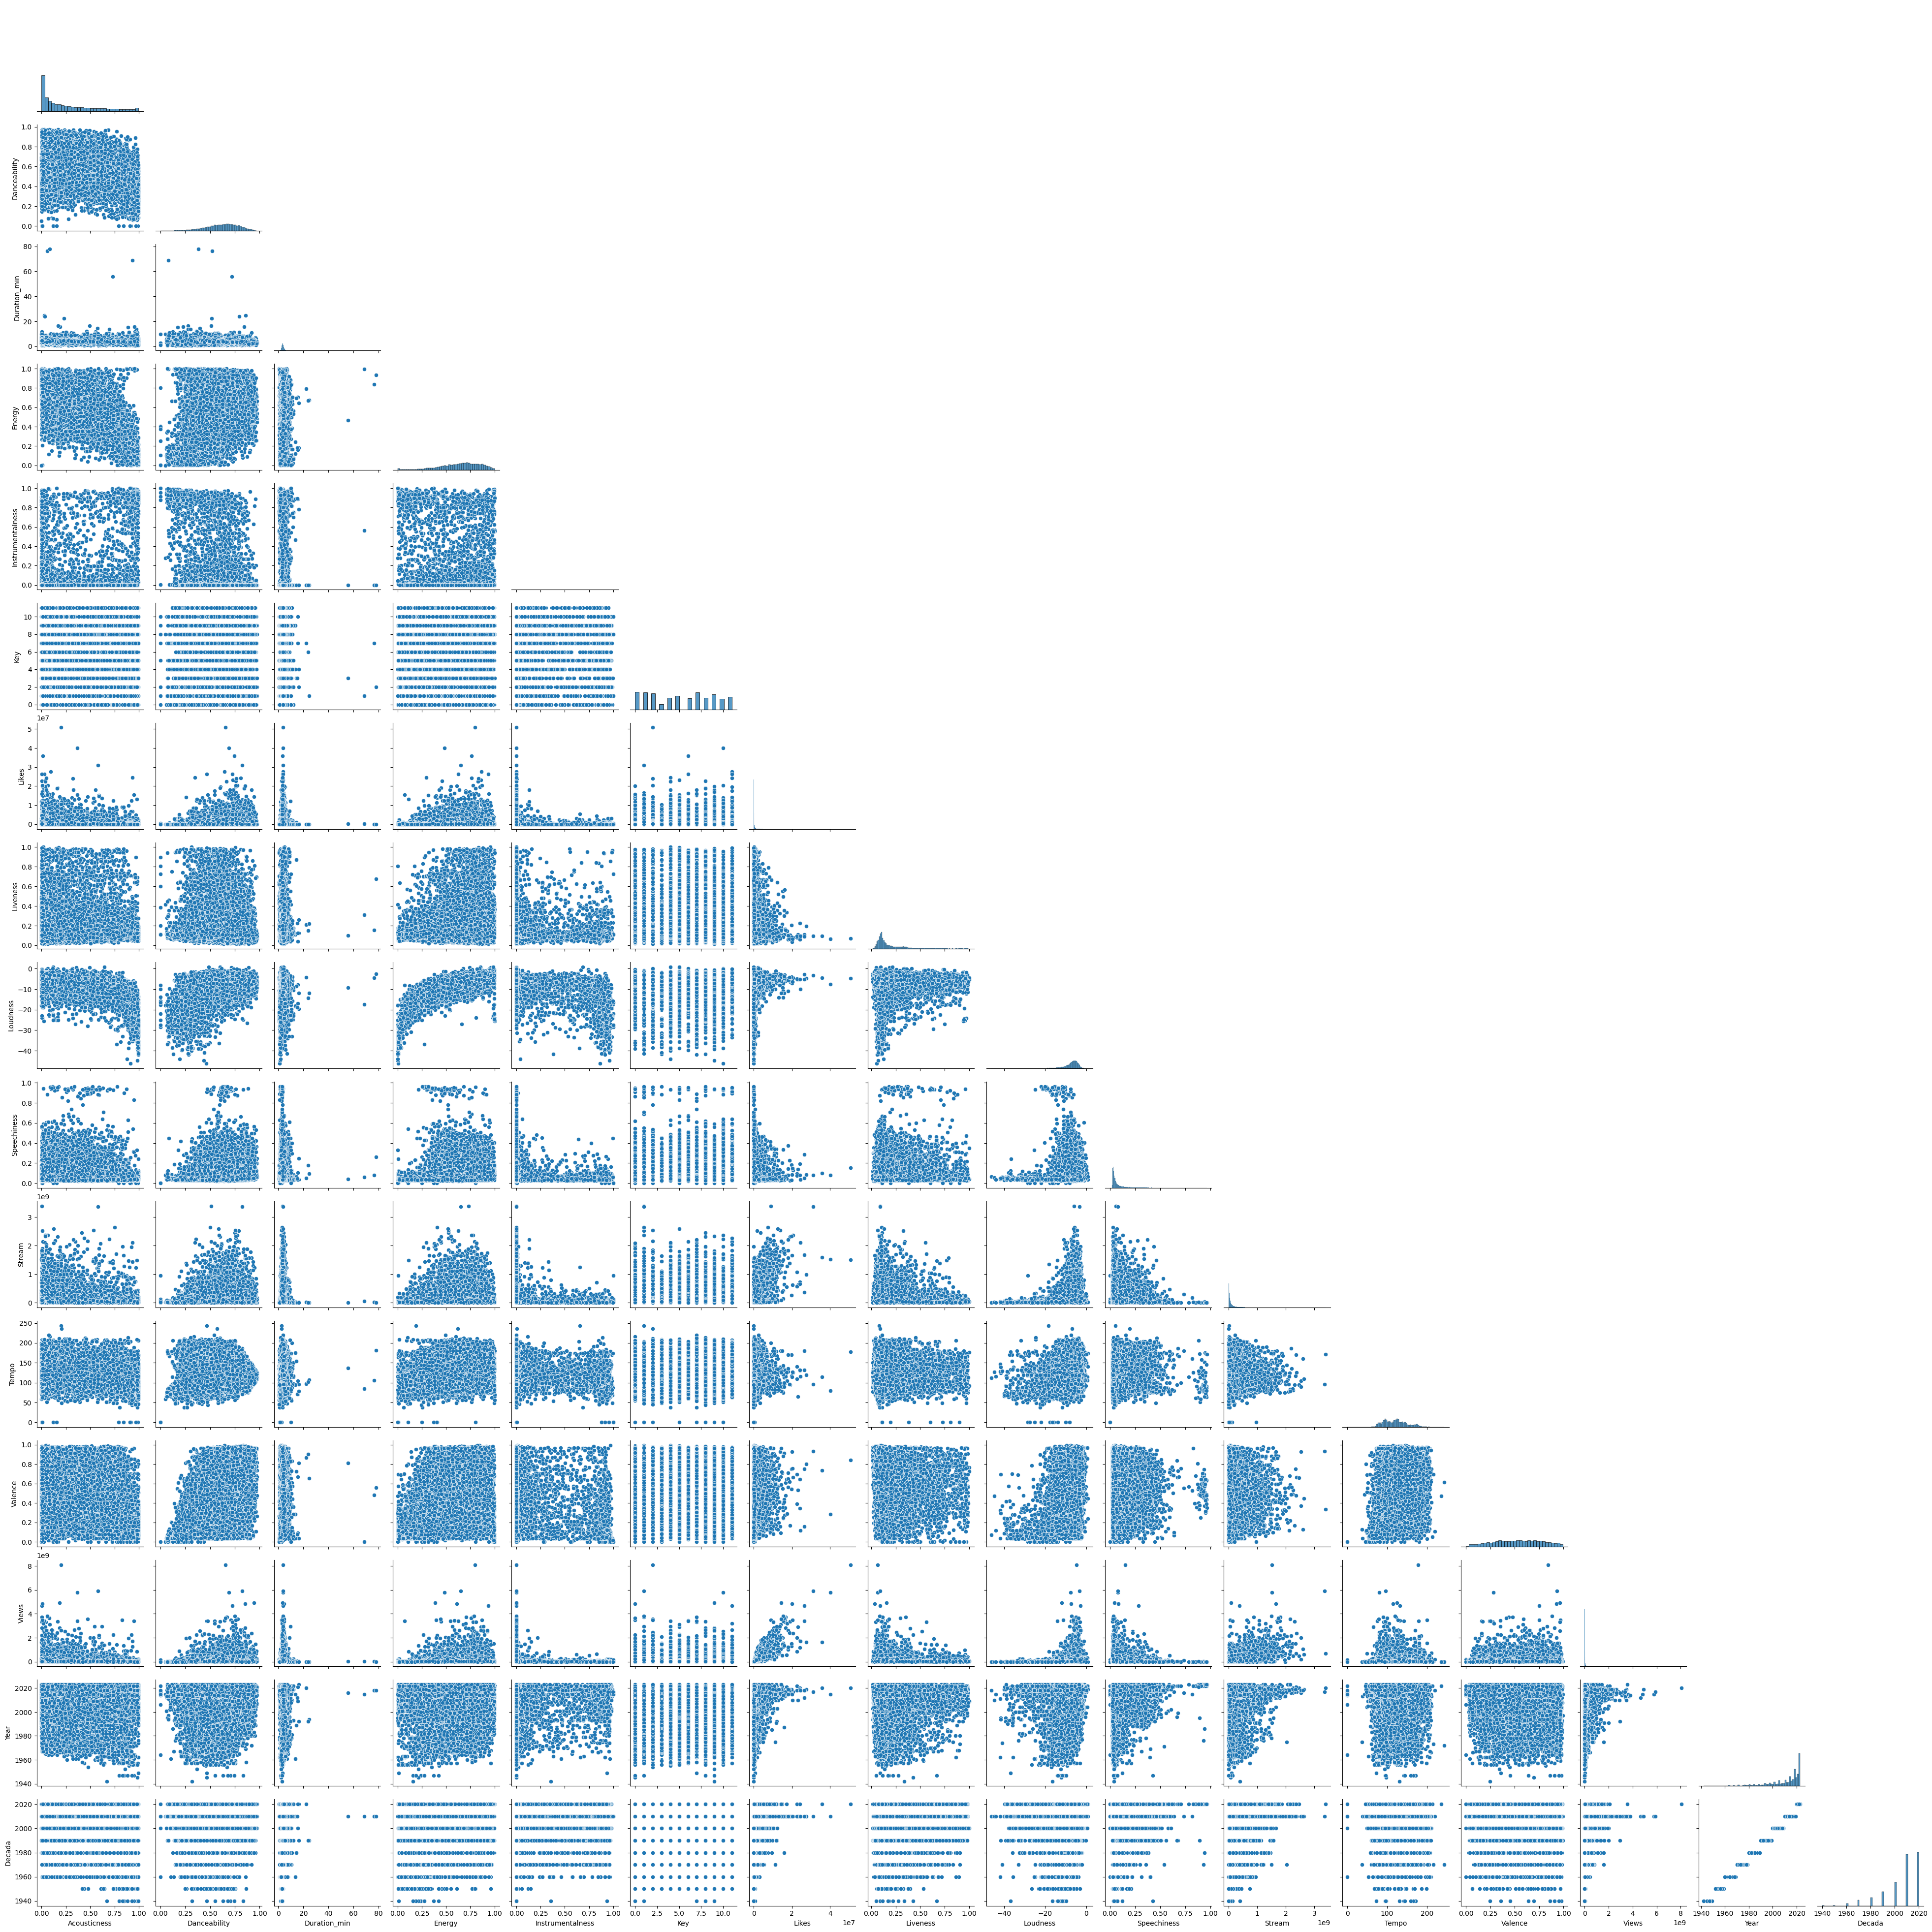

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas relevantes para el parplot
df_pairplot =df_caracteristicas
#df_pairplot = df_final[['Acousticness', 'Danceability', 'Energy', 'Likes', 'Stream', 'Valence']]

# Crear el pairplot
sns.pairplot(df_pairplot, diag_kind='hist', corner=True)

# Mostrar el gráfico
plt.show()

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df_artistas['Genero'] = df_artistas['Genero'].apply(lambda x: x.split(', '))

In [55]:
df_artistas['Genero']

0                [alternative hip hop, modern rock, rock]
1       [alternative rock, funk metal, funk rock, perm...
2       [east coast hip hop, gangster rap, hip hop, po...
3       [hard rock, metal, old school thrash, rock, th...
4                                   [permanent wave, pop]
                              ...                        
2074         [musica chihuahuense, nueva musica mexicana]
2075                                              [k-pop]
2076                                   [k-pop girl group]
2077                                        [bedroom r&b]
2078                                      [gym hardstyle]
Name: Genero, Length: 2079, dtype: object

In [56]:
Generos_totales = []

for gen in df_artistas['Genero']:
    Generos_totales.extend(gen)  # Agregamos directamente cada género a la lista


In [57]:
from collections import Counter

conteo_generos = Counter(Generos_totales)

# Convertir el diccionario en un DataFrame para visualizarlo mejor
df_generos = pd.DataFrame(conteo_generos.items(), columns=['Género', 'Frecuencia'])

# Ordenar de mayor a menor frecuencia
df_generos = df_generos.sort_values(by='Frecuencia', ascending=False)




In [58]:
df_generos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 17 to 1075
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Género      1114 non-null   object
 1   Frecuencia  1114 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.1+ KB


In [59]:
df_generos

Género  Frecuencia
17                   pop         185
2                   rock         181
12                   rap         138
28             dance pop         107
86                 filmi          98
...                  ...         ...
1079        detroit trap           1
1078  manchester hip hop           1
1077     argentine indie           1
1076      indonesian r&b           1
1075        bedroom soul           1

[1114 rows x 2 columns]

In [60]:
# Obtener los 50 géneros más frecuentes
top_50_generos = set(df_generos['Género'].head(100))  # Convertir a conjunto para filtrado rápido

# Filtrar los géneros en df_artistas
def filtrar_generos(lista_generos):
    return [gen for gen in lista_generos if gen in top_50_generos]  # Mantener solo los top 50

df_artistas['Genero_filtrado'] = df_artistas['Genero'].apply(filtrar_generos)






In [61]:
df_artistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Artist           2079 non-null   object
 1   Genero           2079 non-null   object
 2   Genero_filtrado  2079 non-null   object
dtypes: object(3)
memory usage: 48.9+ KB


In [62]:
top_50_generos

{'',
 'adult standards',
 'album rock',
 'alt z',
 'alternative metal',
 'alternative rock',
 'argentine rock',
 'arrocha',
 'art pop',
 'atl hip hop',
 'banda',
 'canadian pop',
 'classic rock',
 'classical',
 'colombian pop',
 'conscious hip hop',
 'contemporary country',
 'corrido',
 'country',
 'country road',
 'country rock',
 'dance pop',
 'dance rock',
 'desi pop',
 'dirty south rap',
 'east coast hip hop',
 'edm',
 'electro house',
 'europop',
 'filmi',
 'folk',
 'folk rock',
 'french hip hop',
 'gangster rap',
 'glam metal',
 'hard rock',
 'hardcore hip hop',
 'heartland rock',
 'hip hop',
 'hip pop',
 'indie rock',
 'indietronica',
 'k-pop',
 'latin alternative',
 'latin arena pop',
 'latin hip hop',
 'latin pop',
 'latin rock',
 'mellow gold',
 'melodic rap',
 'metal',
 'mexican pop',
 'modern bollywood',
 'modern rock',
 'mpb',
 'musica mexicana',
 'neo mellow',
 'neo soul',
 'new romantic',
 'new wave',
 'new wave pop',
 'norteno',
 'nu metal',
 'nueva musica mexicana',
 '

In [63]:
generos_totales = set([g for lista in df_artistas['Genero_filtrado'] for g in lista])
print(f"Número total de géneros únicos antes del encoding: {len(generos_totales)}")
print("Algunos géneros encontrados:", list(generos_totales)[:20])  # Mostrar solo 20 para no saturar



Número total de géneros únicos antes del encoding: 100
Algunos géneros encontrados: ['', 'indie rock', 'colombian pop', 'alternative rock', 'pop punk', 'soul', 'pov: indie', 'dance rock', 'permanent wave', 'southern hip hop', 'banda', 'sertanejo', 'nueva musica mexicana', 'sad sierreno', 'europop', 'dirty south rap', 'new wave', 'pop rap', 'argentine rock', 'pop dance']


In [64]:
df_artistas

Artist  \
0                  Gorillaz   
1     Red Hot Chili Peppers   
2                   50 Cent   
3                 Metallica   
4                  Coldplay   
...                     ...   
2074         Grupo Frontera   
2075              Jung Kook   
2076            LE SSERAFIM   
2077               ThxSoMch   
2078            SICK LEGEND   

                                                 Genero  \
0              [alternative hip hop, modern rock, rock]   
1     [alternative rock, funk metal, funk rock, perm...   
2     [east coast hip hop, gangster rap, hip hop, po...   
3     [hard rock, metal, old school thrash, rock, th...   
4                                 [permanent wave, pop]   
...                                                 ...   
2074       [musica chihuahuense, nueva musica mexicana]   
2075                                            [k-pop]   
2076                                 [k-pop girl group]   
2077                                      [bedroom r&b]   
2078                                    [gym hardstyle]   

                                        Genero_filtrado  
0                                   [modern rock, rock]  
1              [alternative rock, permanent wave, rock]  
2     [east coast hip hop, gangster rap, hip hop, po...  
3                              [hard rock, metal, rock]  
4                                 [permanent wave, pop]  
...                                                 ...  
2074                            [nueva musica mexicana]  
2075                                            [k-pop]  
2076                                                 []  
2077                                                 []  
2078                                                 []  

[2079 rows x 3 columns]

In [65]:
#si hay artistas con generos nulos
num_vacios = (df_artistas['Genero_filtrado'].str.len() == 0).sum()
print(f"Número de filas con género vacío: {num_vacios}")
print(f"% de artistas sin genero: {num_vacios*100/2079}")










Número de filas con género vacío: 479
% de artistas sin genero: 23.03992303992304


In [66]:
# Usar MultiLabelBinarizer para hacer one-hot encoding
mlb = MultiLabelBinarizer()
generos_encoded = pd.DataFrame(mlb.fit_transform(df_artistas['Genero_filtrado']), columns=mlb.classes_)


In [67]:
generos_encoded

adult standards  album rock  alt z  alternative metal  \
0     0                0           0      0                  0   
1     0                0           0      0                  0   
2     0                0           0      0                  0   
3     0                0           0      0                  0   
4     0                0           0      0                  0   
...  ..              ...         ...    ...                ...   
2074  0                0           0      0                  0   
2075  0                0           0      0                  0   
2076  0                0           0      0                  0   
2077  0                0           0      0                  0   
2078  0                0           0      0                  0   

      alternative rock  argentine rock  arrocha  art pop  atl hip hop  ...  \
0                    0               0        0        0            0  ...   
1                    1               0        0        0            0  ...   
2                    0               0        0        0            0  ...   
3                    0               0        0        0            0  ...   
4                    0               0        0        0            0  ...   
...                ...             ...      ...      ...          ...  ...   
2074                 0               0        0        0            0  ...   
2075                 0               0        0        0            0  ...   
2076                 0               0        0        0            0  ...   
2077                 0               0        0        0            0  ...   
2078                 0               0        0        0            0  ...   

      spanish pop  synthpop  trap  trap latino  tropical  uk dance  uk pop  \
0               0         0     0            0         0         0       0   
1               0         0     0            0         0         0       0   
2               0         0     0            0         0         0       0   
3               0         0     0            0         0         0       0   
4               0         0     0            0         0         0       0   
...           ...       ...   ...          ...       ...       ...     ...   
2074            0         0     0            0         0         0       0   
2075            0         0     0            0         0         0       0   
2076            0         0     0            0         0         0       0   
2077            0         0     0            0         0         0       0   
2078            0         0     0            0         0         0       0   

      urban contemporary  urbano latino  vocal jazz  
0                      0              0           0  
1                      0              0           0  
2                      0              0           0  
3                      0              0           0  
4                      0              0           0  
...                  ...            ...         ...  
2074                   0              0           0  
2075                   0              0           0  
2076                   0              0           0  
2077                   0              0           0  
2078                   0              0           0  

[2079 rows x 100 columns]

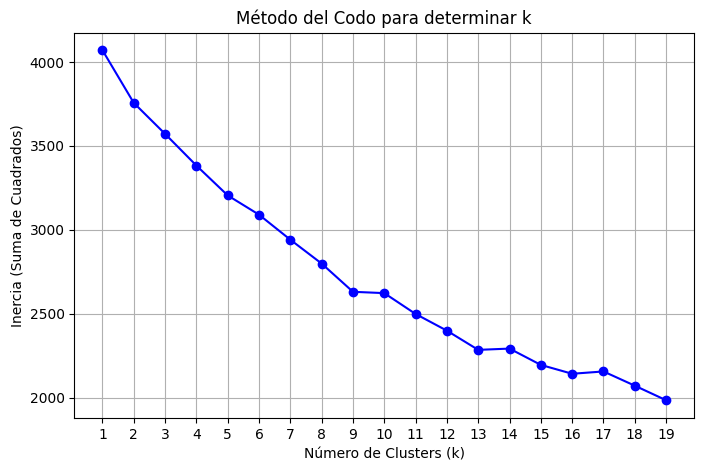

In [68]:
# Determinar el número óptimo de clusters usando el método del codo
inertia = []
K_range = range(1, 20)  # Probamos con clusters de 1 a 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(generos_encoded)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de Cuadrados)')
plt.title('Método del Codo para determinar k')
plt.xticks(K_range)
plt.grid(True)
plt.show()

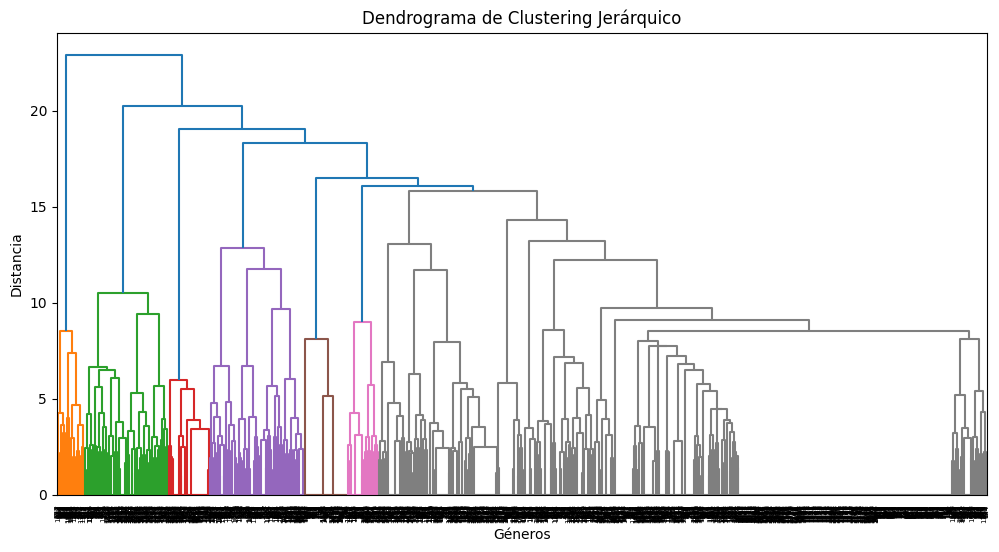

In [69]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(generos_encoded, method='ward'))
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Géneros")
plt.ylabel("Distancia")
plt.show()


In [70]:
from scipy.cluster.hierarchy import fcluster

# Cortar el dendrograma a una distancia específica (ejemplo: 10)
clusters = fcluster(sch.linkage(generos_encoded, method='ward'), t=15, criterion='distance')

# Agregar los clusters al DataFrame
df_artistas['Cluster'] = clusters

# Ver cuántos clusters se generaron
print(f"Número de clusters: {len(set(clusters))}")


Número de clusters: 8


In [71]:
# Aplicar K-Means para encontrar clusters
num_clusters =8  # Define el número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_artistas['Cluster'] = kmeans.fit_predict(generos_encoded)

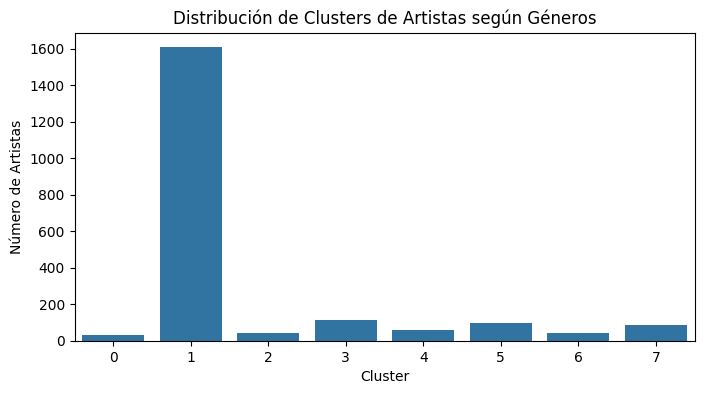

In [72]:
# Visualizar los clusters
plt.figure(figsize=(8, 4))
sns.countplot(x=df_artistas['Cluster'])
plt.xlabel('Cluster')
plt.ylabel('Número de Artistas')
plt.title('Distribución de Clusters de Artistas según Géneros')
plt.show()


In [73]:
clusters=df_artistas['Cluster'].unique()

In [74]:
generos_por_cluster = df_artistas.groupby('Cluster')['Genero_filtrado'].sum()  # Suma de listas dentro de cada cluster

In [75]:
df_artistas

Artist  \
0                  Gorillaz   
1     Red Hot Chili Peppers   
2                   50 Cent   
3                 Metallica   
4                  Coldplay   
...                     ...   
2074         Grupo Frontera   
2075              Jung Kook   
2076            LE SSERAFIM   
2077               ThxSoMch   
2078            SICK LEGEND   

                                                 Genero  \
0              [alternative hip hop, modern rock, rock]   
1     [alternative rock, funk metal, funk rock, perm...   
2     [east coast hip hop, gangster rap, hip hop, po...   
3     [hard rock, metal, old school thrash, rock, th...   
4                                 [permanent wave, pop]   
...                                                 ...   
2074       [musica chihuahuense, nueva musica mexicana]   
2075                                            [k-pop]   
2076                                 [k-pop girl group]   
2077                                      [bedroom r&b]   
2078                                    [gym hardstyle]   

                                        Genero_filtrado  Cluster  
0                                   [modern rock, rock]        1  
1              [alternative rock, permanent wave, rock]        1  
2     [east coast hip hop, gangster rap, hip hop, po...        3  
3                              [hard rock, metal, rock]        1  
4                                 [permanent wave, pop]        1  
...                                                 ...      ...  
2074                            [nueva musica mexicana]        1  
2075                                            [k-pop]        1  
2076                                                 []        1  
2077                                                 []        1  
2078                                                 []        1  

[2079 rows x 4 columns]

In [76]:
# Agrupar géneros por cluster
generos_por_cluster = df_artistas.groupby('Cluster')['Genero_filtrado'].sum()  # Suma de listas dentro de cada cluster

# Convertir a conjuntos para eliminar duplicados en cada cluster
generos_por_cluster = generos_por_cluster.apply(set)

# Convertir en un DataFrame para mejor visualización
df_generos_clusters = pd.DataFrame({'Cluster': generos_por_cluster.index, 'Géneros': generos_por_cluster.values})




In [77]:
df_generos_clusters

Cluster                                            Géneros
0        0  {rap, east coast hip hop, pop rap, gangster ra...
1        1  {, indie rock, colombian pop, alternative rock...
2        2  {rap, east coast hip hop, conscious hip hop, p...
3        3  {hip hop, atl hip hop, rock, alternative rock,...
4        4  {musica mexicana, sierreno, nueva musica mexic...
5        5  {classic rock, rock, singer-songwriter, soft r...
6        6  {latin pop, argentine rock, colombian pop, lat...
7        7  {trap latino, latin pop, colombian pop, latin ...

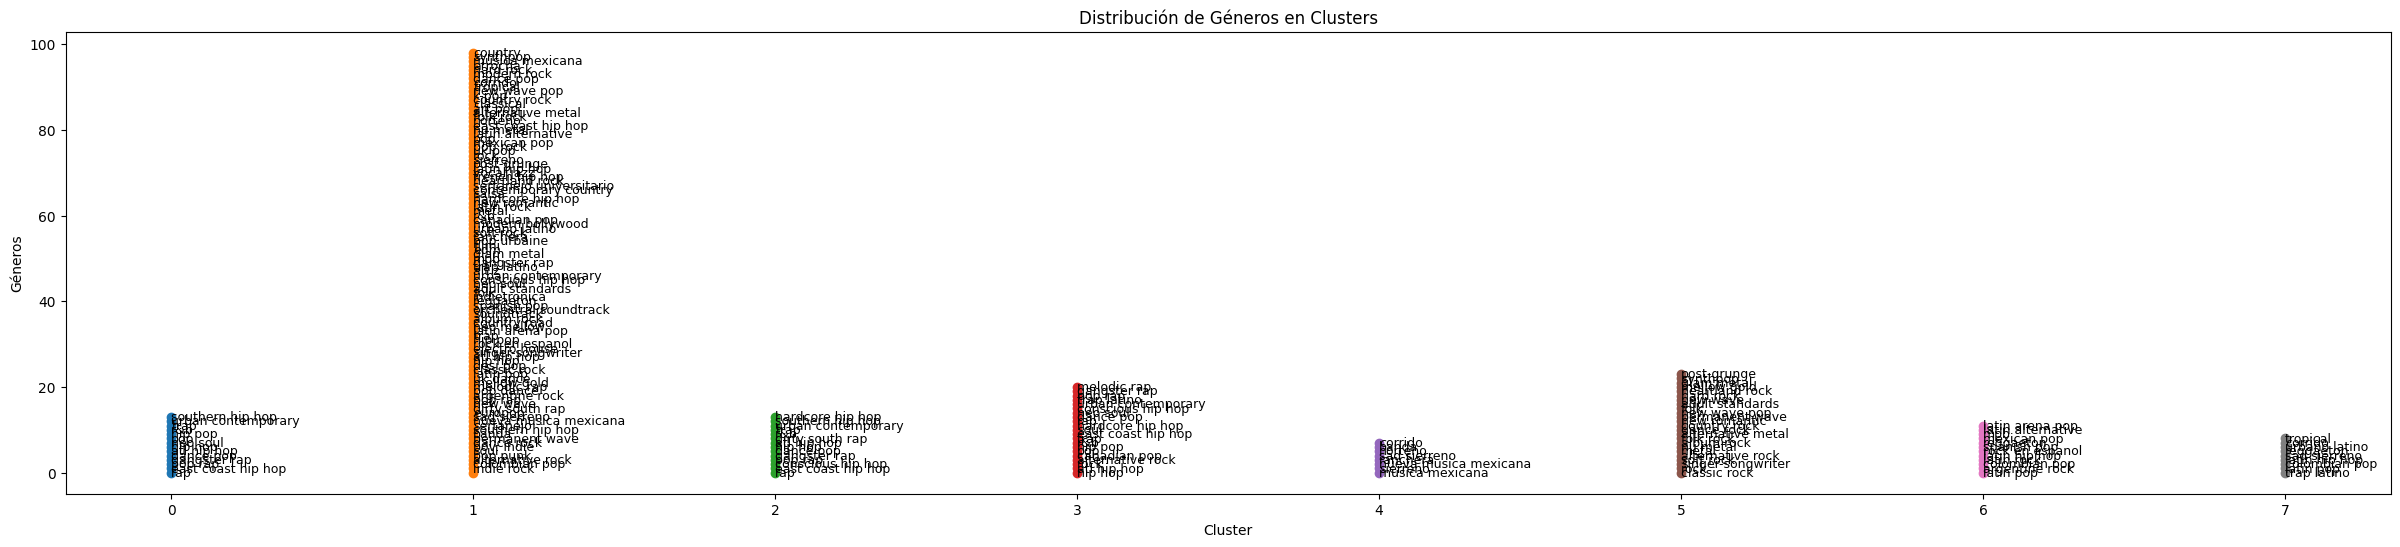

In [78]:
plt.figure(figsize=(30, 6))

# Dibujar puntos por cluster
for cluster, generos in generos_por_cluster.items():
    y_values = range(len(generos))
    plt.scatter([cluster] * len(generos), y_values, label=f'Cluster {cluster}')
    
    # Etiquetas de géneros
    for y, genero in zip(y_values, generos):
        plt.text(cluster, y, genero, fontsize=9, ha='left', va='center')

plt.xlabel("Cluster")
plt.ylabel("Géneros")
plt.title("Distribución de Géneros en Clusters")
plt.show()


/tmp/ipykernel_483687/837050260.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_data, x='Frecuencia', y='Genero', palette='viridis')


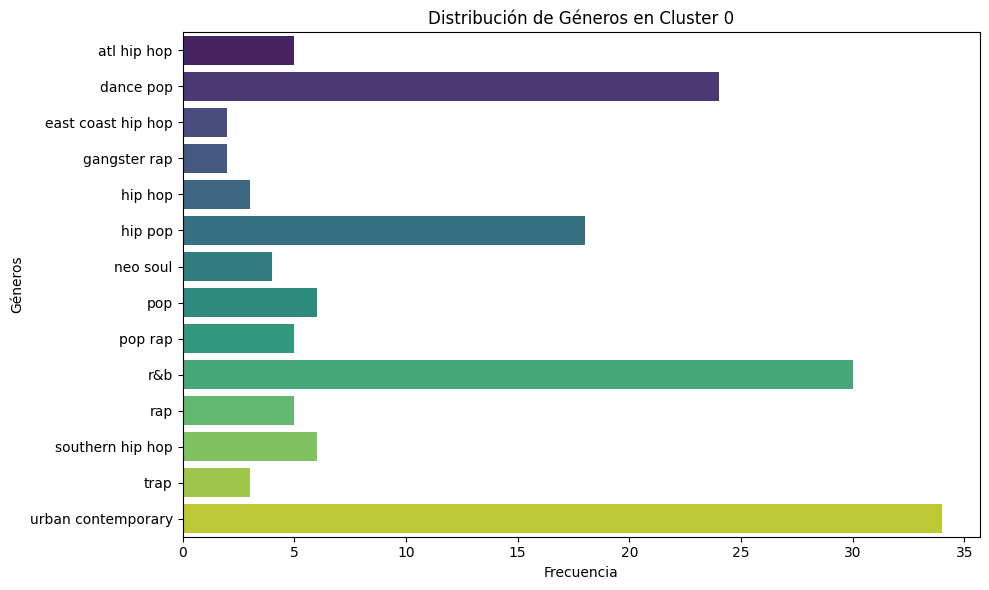

/tmp/ipykernel_483687/837050260.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_data, x='Frecuencia', y='Genero', palette='viridis')


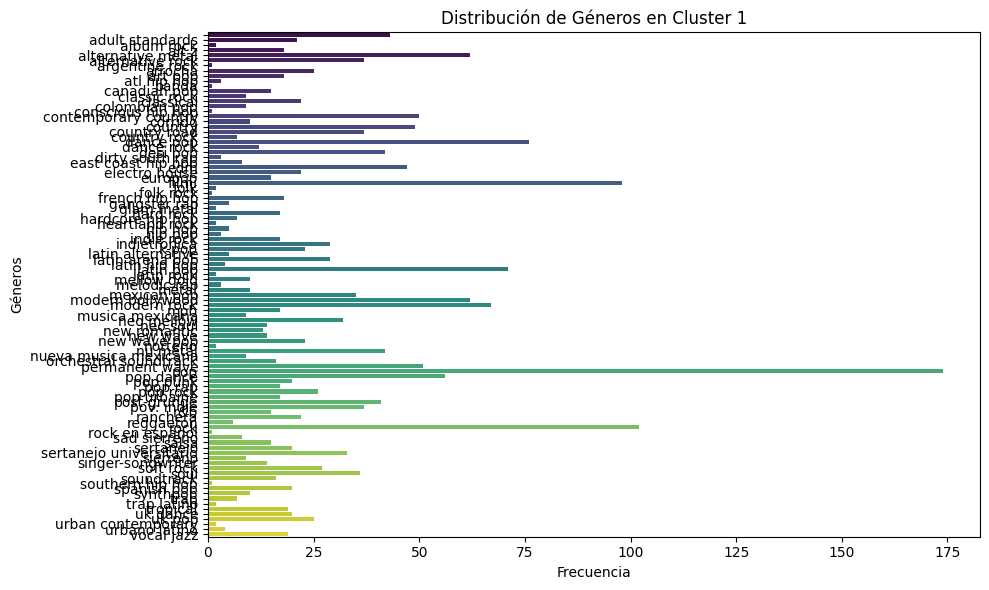

/tmp/ipykernel_483687/837050260.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_data, x='Frecuencia', y='Genero', palette='viridis')


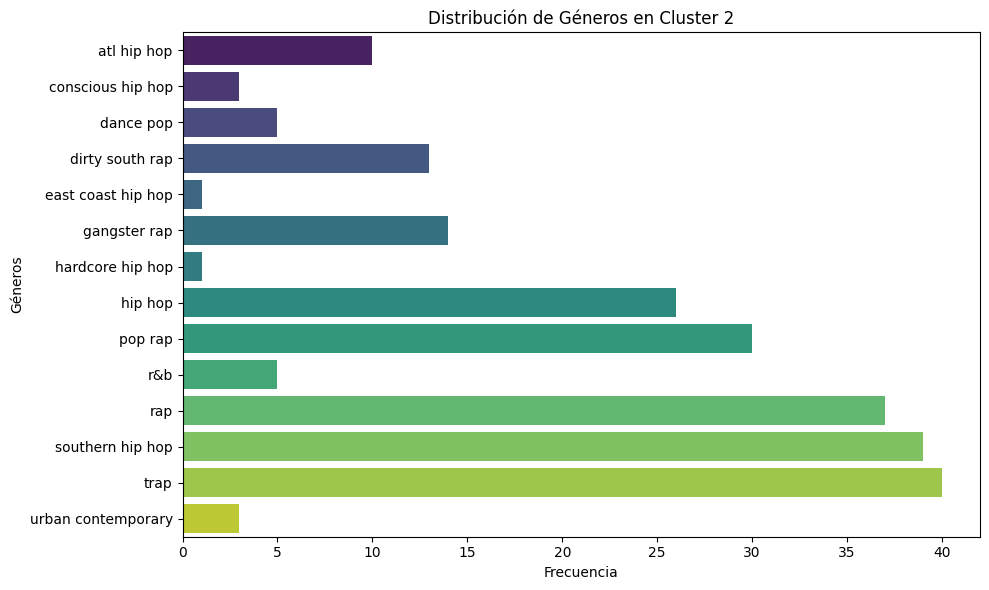

/tmp/ipykernel_483687/837050260.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_data, x='Frecuencia', y='Genero', palette='viridis')


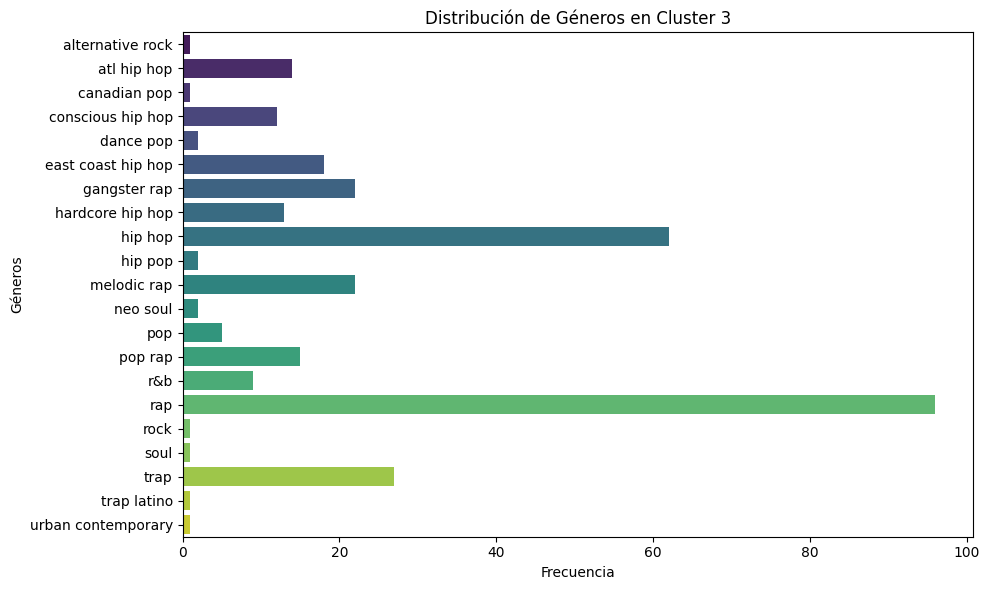

/tmp/ipykernel_483687/837050260.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_data, x='Frecuencia', y='Genero', palette='viridis')


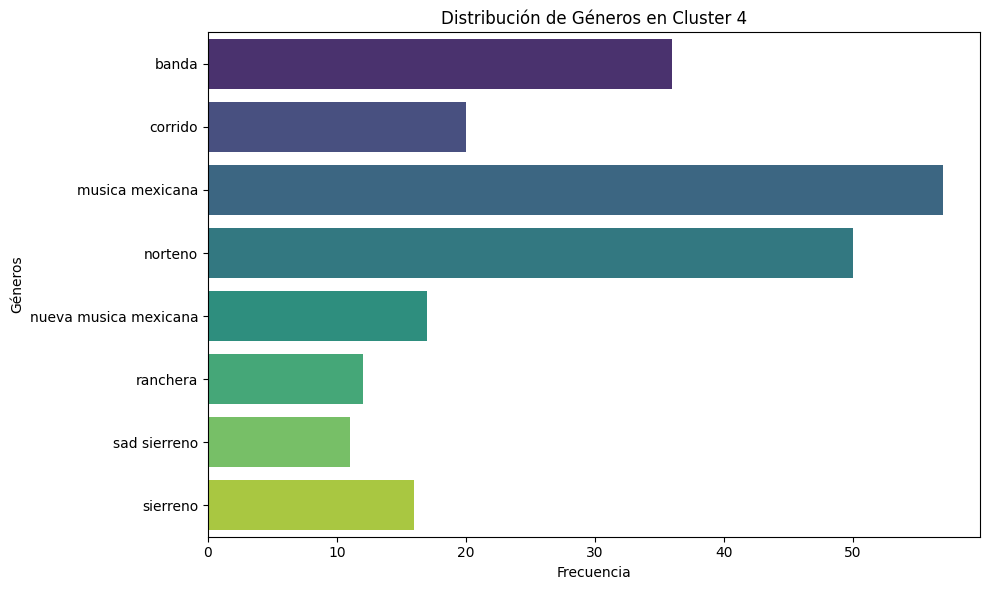

/tmp/ipykernel_483687/837050260.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_data, x='Frecuencia', y='Genero', palette='viridis')


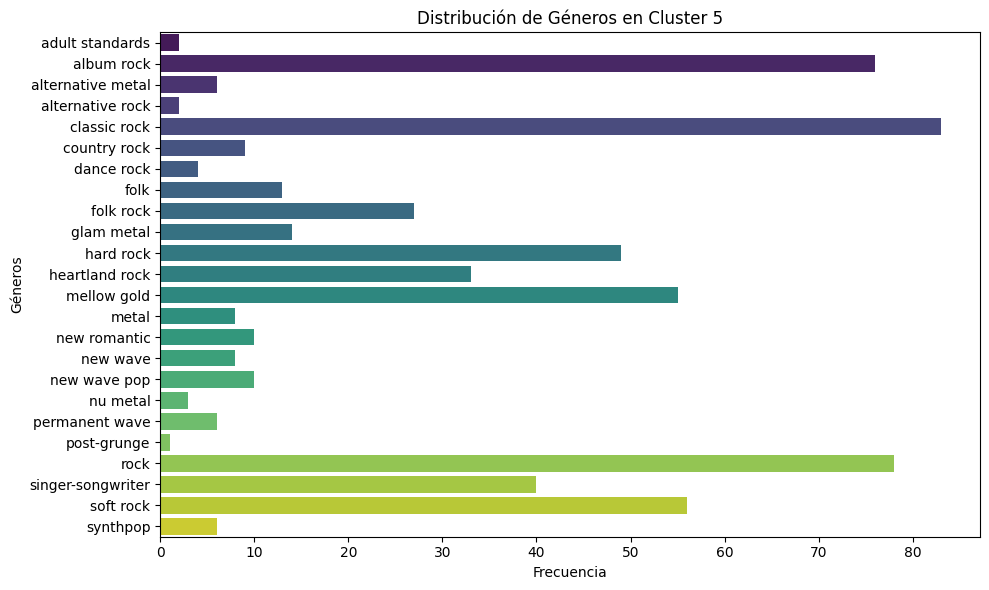

/tmp/ipykernel_483687/837050260.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_data, x='Frecuencia', y='Genero', palette='viridis')


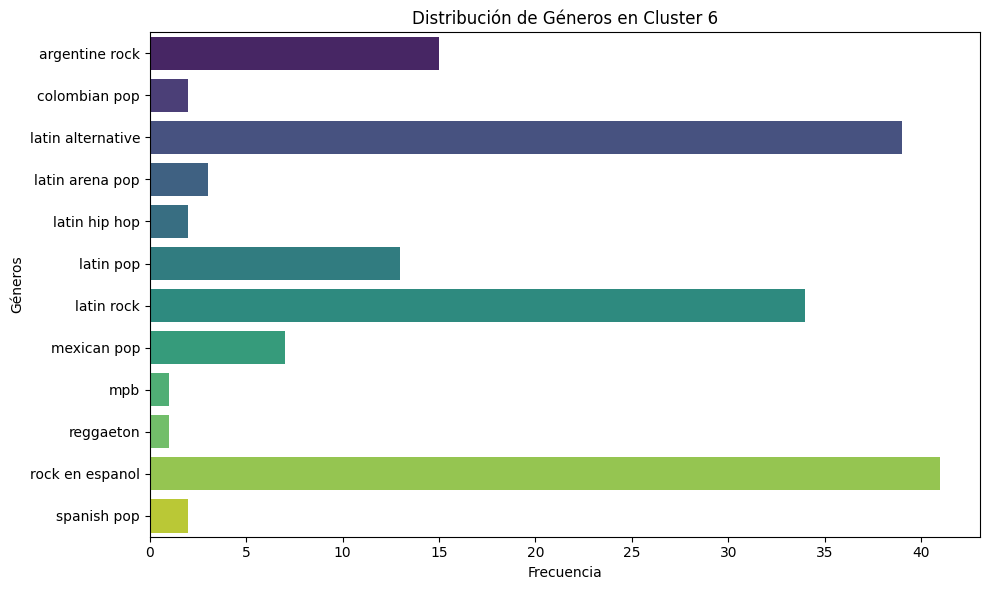

/tmp/ipykernel_483687/837050260.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_data, x='Frecuencia', y='Genero', palette='viridis')


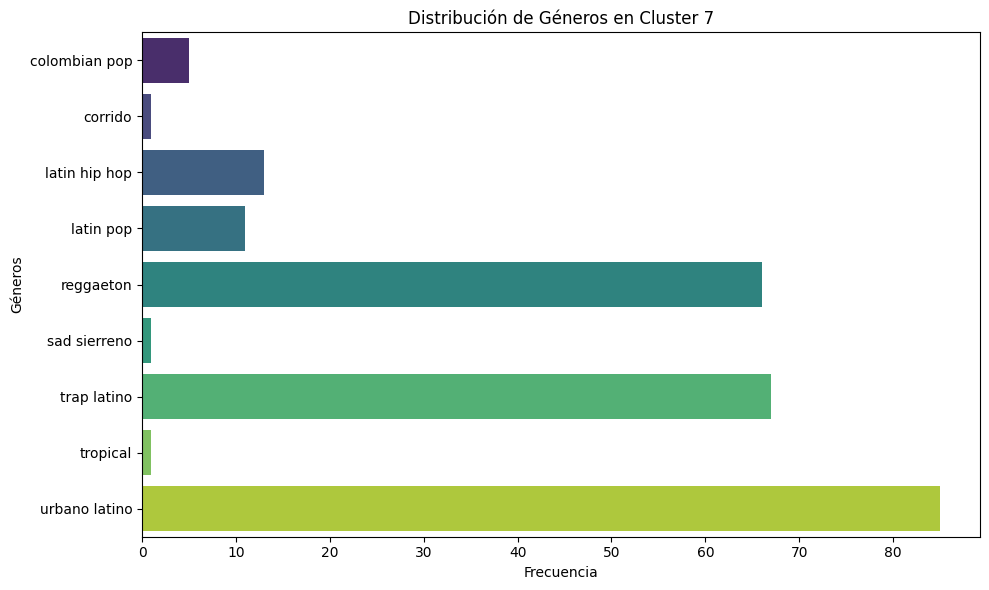

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descomponer 'Genero_filtrado' en una lista plana con sus clusters correspondientes
generos_cluster_data = []

for _, row in df_artistas.iterrows():
    cluster = row['Cluster']
    generos = row['Genero_filtrado']
    for genero in generos:
        generos_cluster_data.append((cluster, genero))

# Crear un DataFrame para la distribución
df_genero_cluster = pd.DataFrame(generos_cluster_data, columns=['Cluster', 'Genero'])

# Contar la frecuencia de cada género por cluster
distribucion_generos = df_genero_cluster.groupby(['Cluster', 'Genero']).size().reset_index(name='Frecuencia')

# Graficar la distribución para cada cluster
for cluster in distribucion_generos['Cluster'].unique():
    # Filtrar los datos para el cluster actual
    cluster_data = distribucion_generos[distribucion_generos['Cluster'] == cluster]

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(data=cluster_data, x='Frecuencia', y='Genero', palette='viridis')
    
    plt.title(f'Distribución de Géneros en Cluster {cluster}')
    plt.xlabel('Frecuencia')
    plt.ylabel('Géneros')
    plt.tight_layout()
    plt.show()


In [80]:
df_final = df_final.merge(df_artistas[['Artist', 'Genero_filtrado', 'Cluster']], on='Artist', how='left')


In [81]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16866 entries, 0 to 16865
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Acousticness      16866 non-null  float64       
 1   Album             16866 non-null  object        
 2   Album_type        16866 non-null  object        
 3   Artist            16866 non-null  object        
 4   Danceability      16866 non-null  float64       
 5   Date              16866 non-null  datetime64[ns]
 6   Duration_ms       16866 non-null  float64       
 7   Energy            16866 non-null  float64       
 8   Instrumentalness  16866 non-null  float64       
 9   Key               16866 non-null  float64       
 10  Licensed          16866 non-null  float64       
 11  Likes             16866 non-null  float64       
 12  Liveness          16866 non-null  float64       
 13  Loudness          16866 non-null  float64       
 14  Speechiness       1686

In [82]:
def busca_genero(x, y):
    if x in y:
        return 1
    else:
        return 0  # ← Faltaba el return aquí

# Aplicar la función a la columna 'Genero_filtrado' para detectar 'rock'
df_final['rock'] = df_final['Genero_filtrado'].apply(lambda x: busca_genero('rock', x))


In [83]:
#cluster_7=df_final[df_final['Cluster']==7]

In [84]:
#cluster_7=df_final[df_final['rock']==1]

In [167]:
df_final['reggaeton'] = df_final['Genero_filtrado'].apply(lambda x: busca_genero('reggaeton', x))

In [109]:
##df_final['metal'] = df_final['Genero_filtrado'].apply(lambda x: busca_genero('metal', x))

In [168]:
cluster_7=df_final[df_final['reggaeton']==1]

In [170]:
cluster_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 30 to 16701
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Acousticness      512 non-null    float64       
 1   Album             512 non-null    object        
 2   Album_type        512 non-null    object        
 3   Artist            512 non-null    object        
 4   Danceability      512 non-null    float64       
 5   Date              512 non-null    datetime64[ns]
 6   Duration_ms       512 non-null    float64       
 7   Energy            512 non-null    float64       
 8   Instrumentalness  512 non-null    float64       
 9   Key               512 non-null    float64       
 10  Licensed          512 non-null    float64       
 11  Likes             512 non-null    float64       
 12  Liveness          512 non-null    float64       
 13  Loudness          512 non-null    float64       
 14  Speechiness       512 non-nu

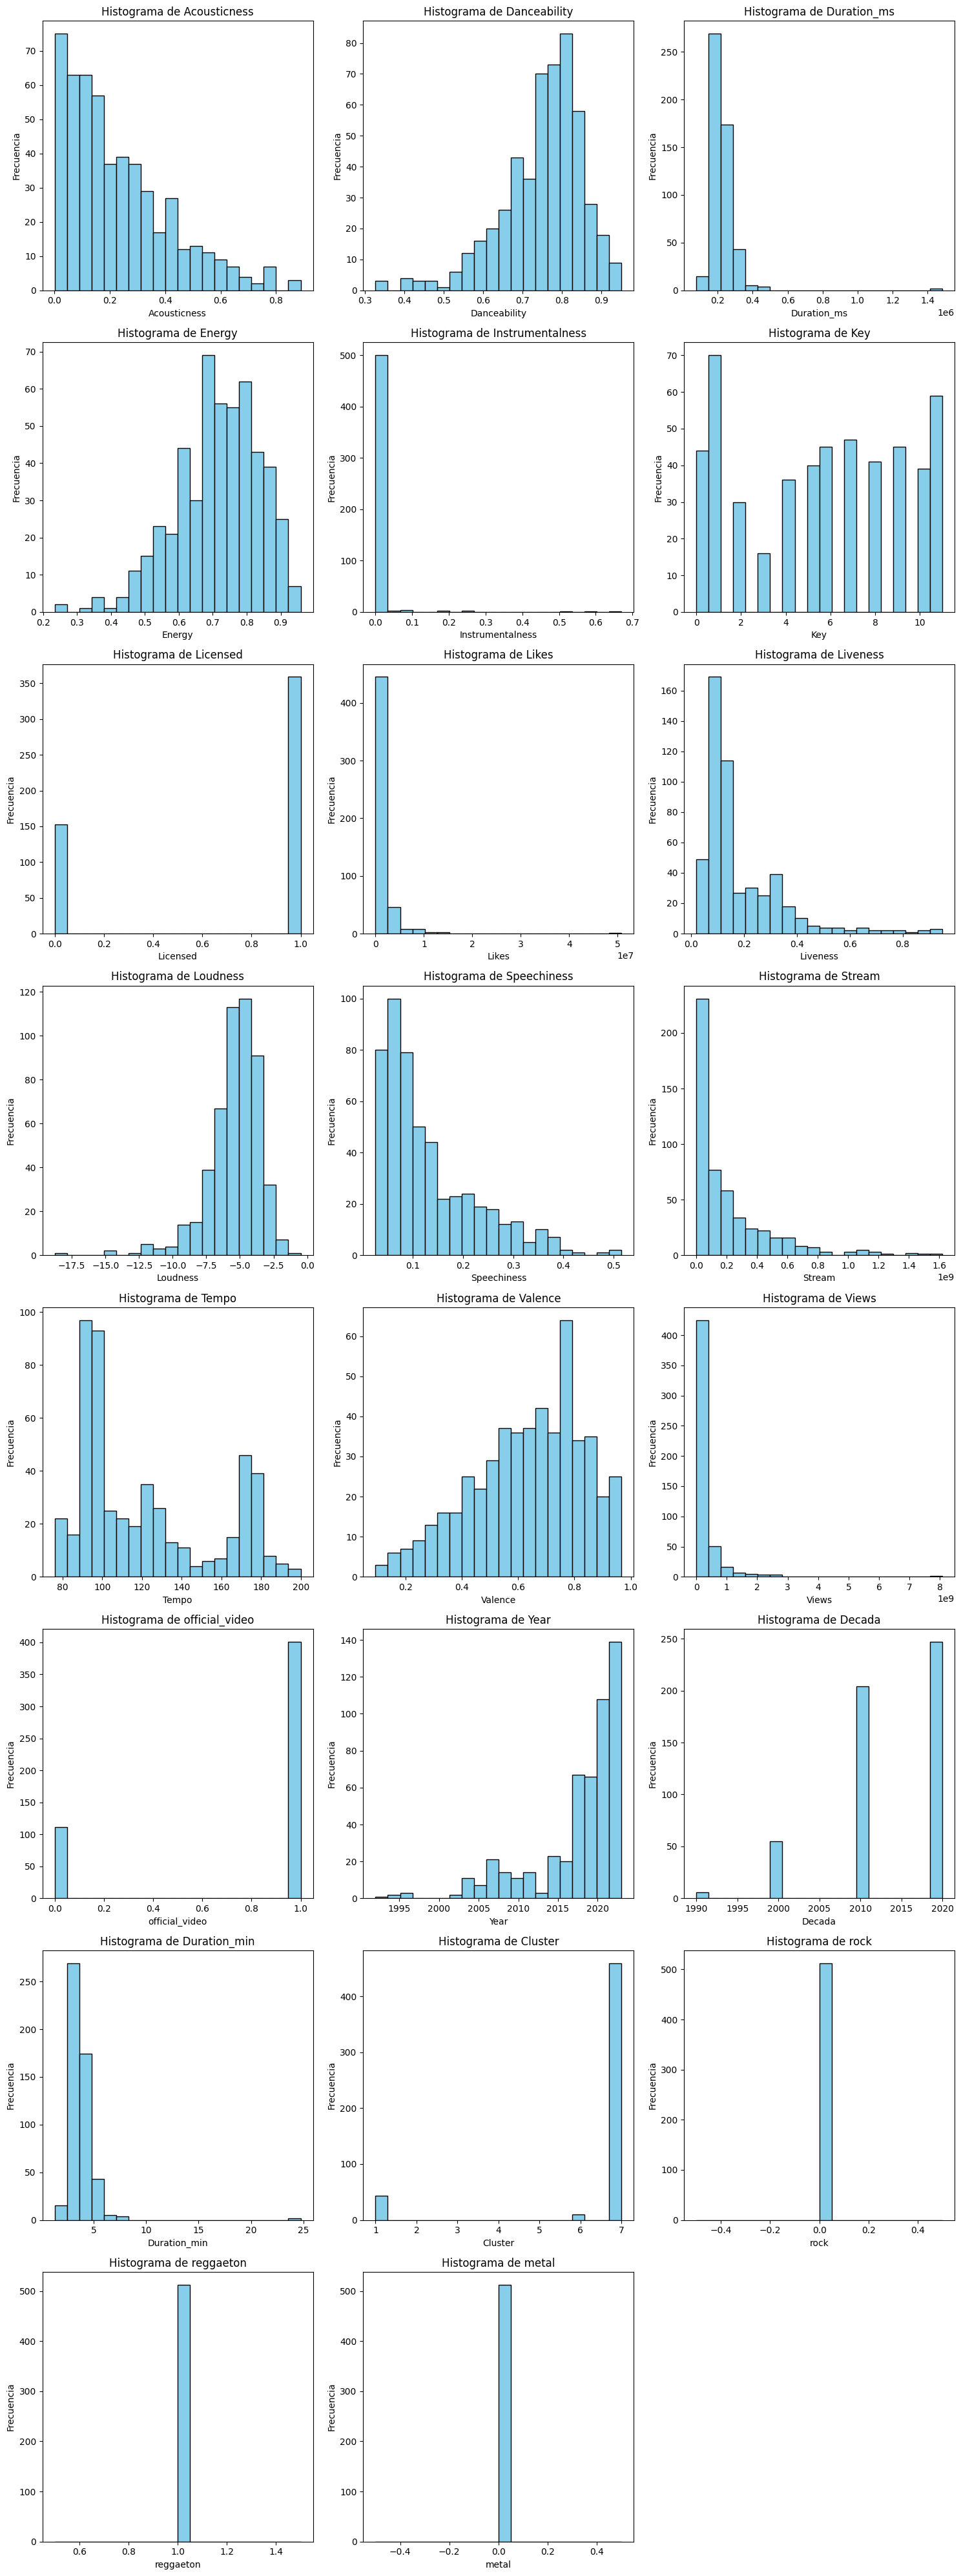

In [146]:
# Filtrar las columnas numéricas
df_caracteristicas_numericas = cluster_7.select_dtypes(include=['number'])

# Configurar la figura para los histogramas
num_columnas = len(df_caracteristicas_numericas.columns)
num_filas = (num_columnas + 2) // 3  # Calcula el número de filas para una cuadrícula de 3 columnas
plt.figure(figsize=(15, num_filas * 5))

# Crear un histograma para cada columna numérica
for i, columna in enumerate(df_caracteristicas_numericas.columns):
    plt.subplot(num_filas, 3, i + 1)  # Configurar subgráficos con 3 columnas
    plt.hist(df_caracteristicas_numericas[columna].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

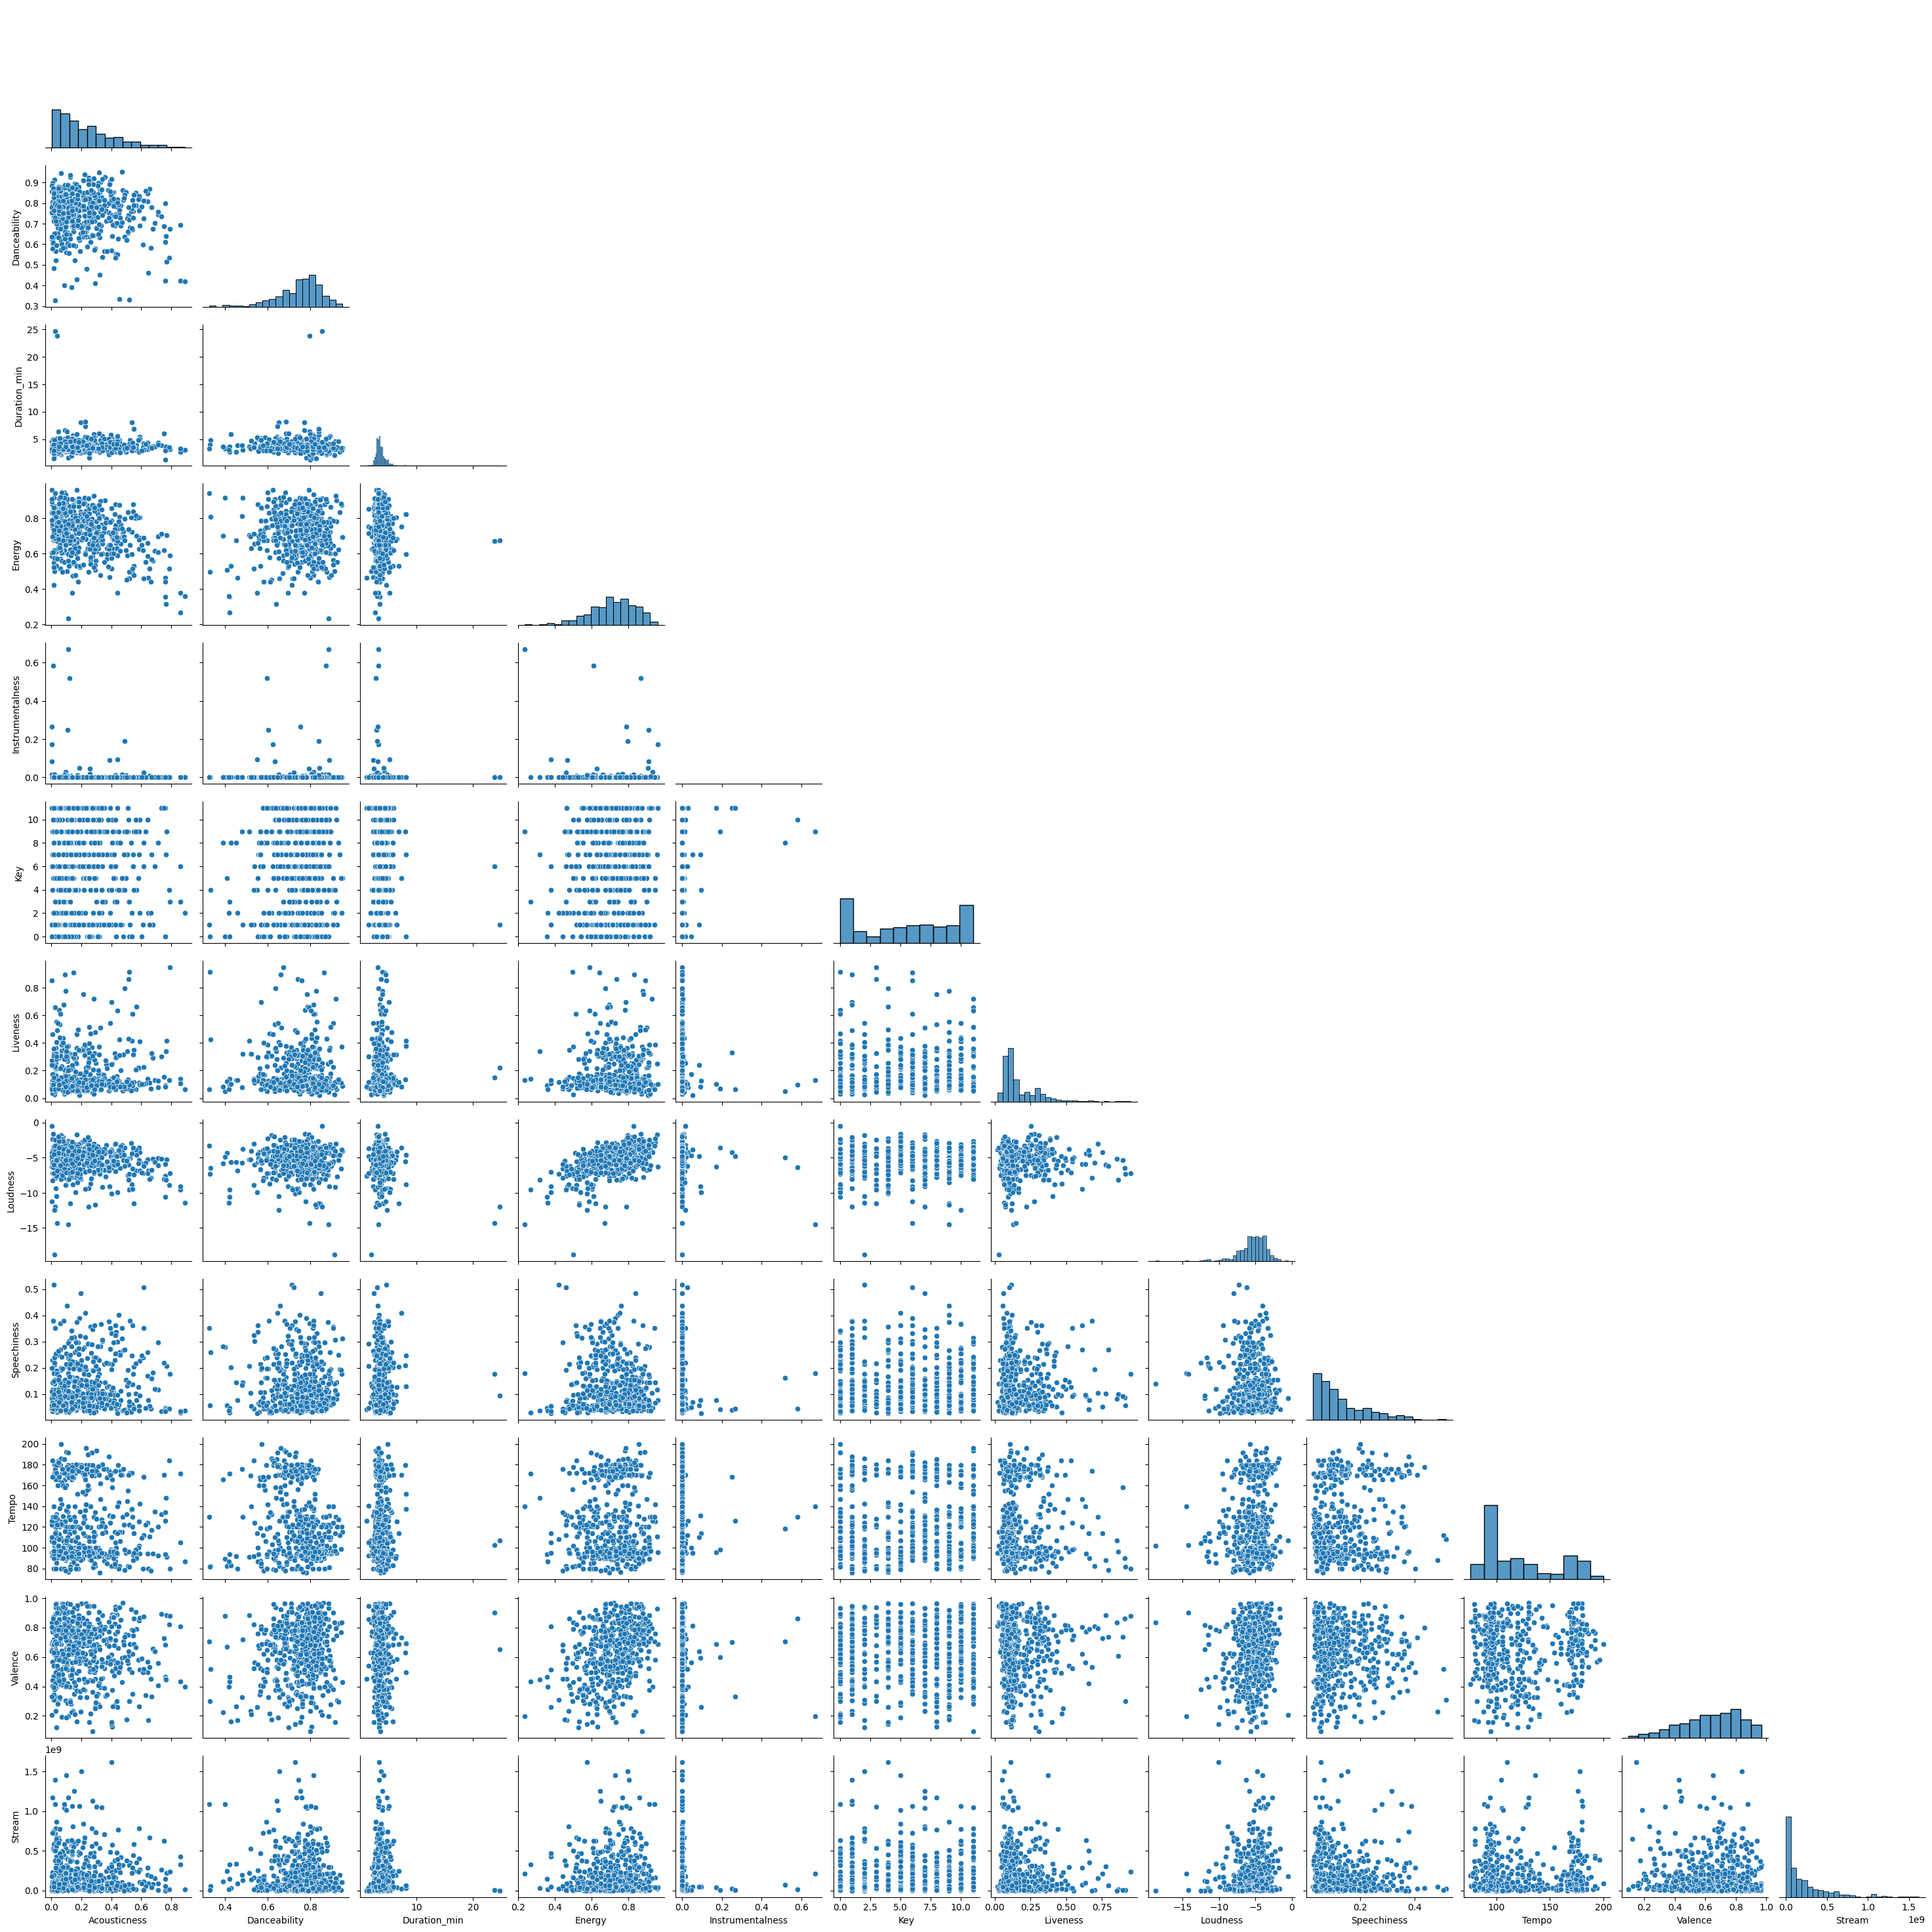

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas relevantes para el parplot
df_pairplot =cluster_7[['Acousticness','Danceability', 'Duration_min', 'Energy',
       'Instrumentalness', 'Key', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence','Stream'
        ]]
#df_pairplot = df_final[['Acousticness', 'Danceability', 'Energy', 'Likes', 'Stream', 'Valence']]

# Crear el pairplot
sns.pairplot(df_pairplot, diag_kind='hist', corner=True)

# Mostrar el gráfico
plt.show()

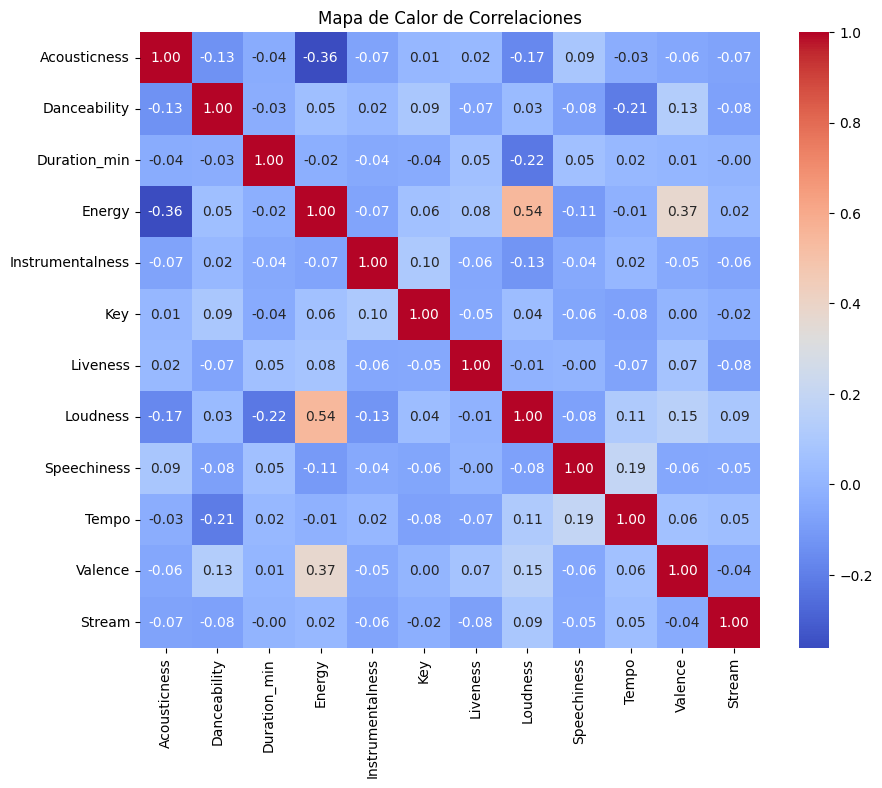

In [148]:

# Visualizar un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular la correlación
correlation = df_pairplot.corr()



plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


In [171]:
cluster_7['Stream'].describe()

count    5.120000e+02
mean     2.081673e+08
std      2.646075e+08
min      1.053550e+05
25%      3.013860e+07
50%      1.053053e+08
75%      2.899427e+08
max      1.620183e+09
Name: Stream, dtype: float64

In [172]:
# Definir los límites manualmente
bins = [0, 300000000, cluster_7['Stream'].max()]
labels = [0,1]

cluster_7['Categoria'] = pd.cut(cluster_7['Stream'], bins=bins, labels=labels, include_lowest=True)
# Ver la distribución de las categorías
print(cluster_7['Categoria'].value_counts())


Categoria
0    391
1    121
Name: count, dtype: int64


/tmp/ipykernel_483687/3235536353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_7['Categoria'] = pd.cut(cluster_7['Stream'], bins=bins, labels=labels, include_lowest=True)


In [173]:


# Filtrar las categorías
categoria_0 = cluster_7[cluster_7['Categoria'] == 0]
categoria_1 = cluster_7[cluster_7['Categoria'] == 1]

# Muestrear 175 registros aleatorios de la categoría 0
categoria_0_sample = categoria_0.sample(n=121, random_state=42)

# Combinar los 175 registros de cada categoría
df_balanceado = pd.concat([categoria_0_sample, categoria_1])

# Barajar las filas (opcional, para mezclar las categorías)
df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar la distribución de las categorías
print(df_balanceado['Categoria'].value_counts())


Categoria
0    121
1    121
Name: count, dtype: int64


In [174]:
cluster_7=df_balanceado

In [153]:
"""cluster_7['Categoria'] = pd.qcut(
    df['Stream'], 
    q=2, 
    labels=[0, 1], 
    duplicates='drop'  # Evita problemas de duplicados
)

# Ver la distribución de las categorías
print(cluster_7['Categoria'].value_counts())"""


"cluster_7['Categoria'] = pd.qcut(\n    df['Stream'], \n    q=2, \n    labels=[0, 1], \n    duplicates='drop'  # Evita problemas de duplicados\n)\n\n# Ver la distribución de las categorías\nprint(cluster_7['Categoria'].value_counts())"

In [175]:
cluster_7[['Stream','Categoria']].head()


Stream Categoria
0   43858243.0         0
1  144271684.0         0
2  666199160.0         1
3  389018942.0         1
4  545505864.0         1

In [176]:
# Eliminar filas con valores nulos en cualquier columna
cluster_7 = cluster_7.dropna()

# Reiniciar los índices después de eliminar filas
cluster_7.reset_index(drop=True, inplace=True)

# Verificar si quedan nulos
print(cluster_7.isnull().sum())


Acousticness        0
Album               0
Album_type          0
Artist              0
Danceability        0
Date                0
Duration_ms         0
Energy              0
Instrumentalness    0
Key                 0
Licensed            0
Likes               0
Liveness            0
Loudness            0
Speechiness         0
Stream              0
Tempo               0
Title               0
Track               0
Valence             0
Views               0
official_video      0
Year                0
Decada              0
Genero              0
Duration_min        0
Genero_filtrado     0
Cluster             0
rock                0
reggaeton           0
metal               0
Categoria           0
dtype: int64


/tmp/ipykernel_483687/2898046452.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_7, x='Categoria', palette='viridis')


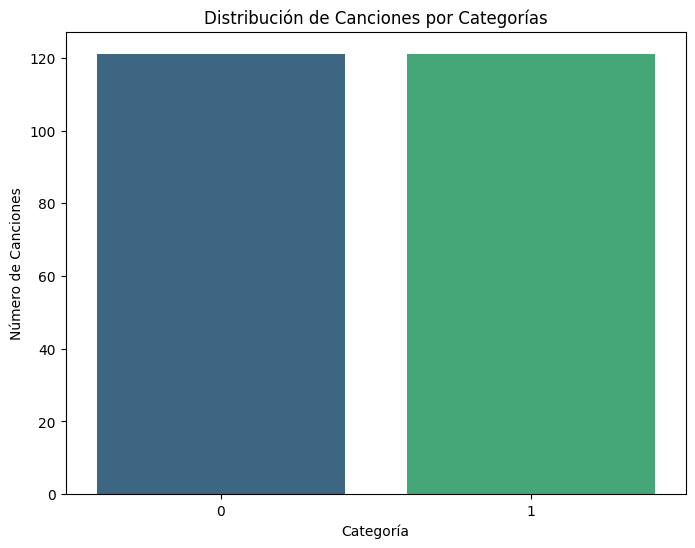

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de las categorías
plt.figure(figsize=(8, 6))
sns.countplot(data=cluster_7, x='Categoria', palette='viridis')
plt.xlabel('Categoría')
plt.ylabel('Número de Canciones')
plt.title('Distribución de Canciones por Categorías')
plt.show()


In [178]:
X=cluster_7[['Acousticness','Danceability', 'Duration_min', 'Energy',
       'Instrumentalness', 'Key', 'Liveness', 'Loudness',
       'Speechiness', 'Tempo', 'Valence',
        ]]

In [179]:
y=cluster_7['Categoria']

In [180]:
from lazypredict.Supervised import LazyClassifier

In [181]:
from sklearn.model_selection import train_test_split, cross_val_score
# 🔹 2. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
lazy_clf= LazyClassifier(verbose=0,
					ignore_warnings=False,
					custom_metric=None)

# fitting data in LazyClassifier
models, predictions = lazy_clf.fit(X_train, X_test,
							y_train, y_test)
models

 31%|███▏      | 10/32 [00:00<00:00, 31.60it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X).
FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'


 81%|████████▏ | 26/32 [00:00<00:00, 36.26it/s]

SelfTrainingClassifier model failed to execute
You must pass an estimator to SelfTrainingClassifier. Use `estimator`.
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
TunedThresholdClassifierCV model failed to execute
TunedThresholdClassifierCV.__init__() missing 1 required positional argument: 'estimator'


100%|██████████| 32/32 [00:01<00:00, 24.26it/s]

XGBClassifier model failed to execute
'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Info] Number of positive: 99, number of negative: 94
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 193, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512953 -> initscore=0.051825
[LightGBM] [Info] Start training from score 0.051825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.65               0.66     0.66      0.65   
SVC                                0.63               0.65     0.65      0.63   
AdaBoostClassifier                 0.63               0.64     0.64      0.63   
Perceptron                         0.63               0.62     0.62      0.62   
RandomForestClassifier             0.61               0.61     0.61      0.61   
BaggingClassifier                  0.61               0.61     0.61      0.61   
DecisionTreeClassifier             0.59               0.59     0.59      0.59   
QuadraticDiscriminantAnalysis      0.53               0.57     0.57      0.44   
NuSVC                              0.57               0.57     0.57      0.57   
GaussianNB                         0.51               0.56     0.56      0.40   
ExtraTreesClassifier               0.55               0.55     0.55      0.55   
LGBMClassifier                     0.55               0.55     0.55      0.55   
RidgeClassifierCV                  0.53               0.54     0.54      0.53   
LinearSVC                          0.53               0.54     0.54      0.53   
LinearDiscriminantAnalysis         0.53               0.54     0.54      0.53   
RidgeClassifier                    0.53               0.54     0.54      0.53   
LogisticRegression                 0.53               0.54     0.54      0.53   
LabelPropagation                   0.53               0.52     0.52      0.53   
LabelSpreading                     0.53               0.52     0.52      0.53   
BernoulliNB                        0.51               0.52     0.52      0.51   
CalibratedClassifierCV             0.49               0.50     0.50      0.48   
DummyClassifier                    0.45               0.50     0.50      0.28   
NearestCentroid                    0.49               0.50     0.50      0.49   
ExtraTreeClassifier                0.49               0.49     0.49      0.49   
PassiveAggressiveClassifier        0.49               0.47     0.47      0.47   
SGDClassifier                      0.47               0.47     0.47      0.47   

                               Time Taken  
Model                                      
KNeighborsClassifier                 0.02  
SVC                                  0.01  
AdaBoostClassifier                   0.10  
Perceptron                           0.01  
RandomForestClassifier               0.12  
BaggingClassifier                    0.04  
DecisionTreeClassifier               0.01  
QuadraticDiscriminantAnalysis        0.02  
NuSVC                                0.03  
GaussianNB                           0.02  
ExtraTreesClassifier                 0.09  
LGBMClassifier                       0.05  
RidgeClassifierCV                    0.01  
LinearSVC                            0.02  
LinearDiscriminantAnalysis           0.02  
RidgeClassifier                      0.01  
LogisticRegression                   0.02  
LabelPropagation                     0.02  
LabelSpreading                       0.01  
BernoulliNB                          0.01  
CalibratedClassifierCV               0.04  
DummyClassifier                      0.02  
NearestCentroid                      0.02  
ExtraTreeClassifier                  0.02  
PassiveAggressiveClassifier          0.02  
SGDClassifier                        0.01

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir el espacio de búsqueda
param_grid = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    scoring='f1_weighted',  # Métrica de evaluación
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Ver los mejores hiperparámetros
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar en el conjunto de prueba
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

from sklearn.metrics import classification_report
print("Reporte de clasificación para el mejor KNN:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Reporte de clasificación para el mejor KNN:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        27
           1       0.58      0.68      0.62        22

    accuracy                           0.63        49
   macro avg       0.64      0.64      0.63        49
weighted avg       0.64      0.63      0.63        49



In [185]:
from sklearn.svm import SVC

# Definir el espacio de búsqueda
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Configurar GridSearchCV
grid_search_svc = GridSearchCV(
    SVC(probability=True),
    param_grid_svc,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Ajustar el modelo
grid_search_svc.fit(X_train, y_train)

# Ver los mejores hiperparámetros
print("Mejores parámetros para SVC:", grid_search_svc.best_params_)

# Evaluar en el conjunto de prueba
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)

print("Reporte de clasificación para el mejor SVC:")
print(classification_report(y_test, y_pred_svc))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores parámetros para SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Reporte de clasificación para el mejor SVC:
              precision    recall  f1-score   support

           0       0.64      0.52      0.57        27
           1       0.52      0.64      0.57        22

    accuracy                           0.57        49
   macro avg       0.58      0.58      0.57        49
weighted avg       0.58      0.57      0.57        49



In [186]:
from xgboost import XGBClassifier

# Entrenar un modelo XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred_xgb = xgb.predict(X_test)

print("Reporte de clasificación con XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Reporte de clasificación con XGBoost:
              precision    recall  f1-score   support

           0       0.64      0.59      0.62        27
           1       0.54      0.59      0.57        22

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.59        49
weighted avg       0.60      0.59      0.59        49



In [189]:
from sklearn.metrics import confusion_matrix

# Supongamos que tienes las etiquetas reales y las predicciones
y_true = y_test  # Etiquetas reales
y_pred = best_knn.predict(X_test)  # Predicciones del modelo

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

print("Matriz de Confusión:")
print(cm)


Matriz de Confusión:
[[16 11]
 [ 7 15]]


balanceo de clases

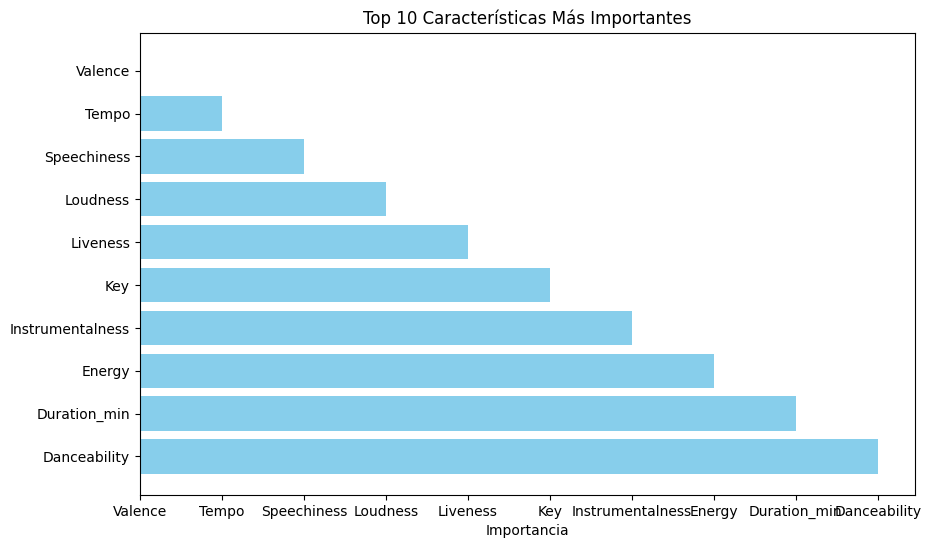

In [188]:
# Obtener la importancia de las características del mejor modelo
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = best_svc.feature_names_in_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Graficar las 10 más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Características Más Importantes')
plt.xlabel('Importancia')
plt.show()


In [162]:
from sklearn.metrics import confusion_matrix

# Supongamos que tienes las etiquetas reales y las predicciones
y_true = y_test  # Etiquetas reales
y_pred = best_rf.predict(X_test)  # Predicciones del modelo

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

print("Matriz de Confusión:")
print(cm)


Matriz de Confusión:
[[ 1  7]
 [ 2 61]]


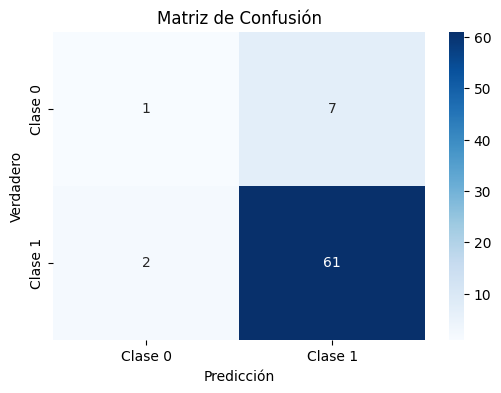

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Etiquetas de las clases (ajusta según tus datos)
class_names = ['Clase 0', 'Clase 1']

# Crear un heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()
